# Prediction of Housing Prices in Ames, Iowa

## Problem Statement

Following the record breaking sale of houses during the summer, it looks like the housing market in Iowa seems to be slowing down. [(source)](https://www.weareiowa.com/article/news/local/after-another-record-breaking-month-iowa-realtor-describes-perfect-storm-housing-market-jen-burkamper/524-b0d79923-32d4-4c82-a6a5-de3c10afbc02)

According to a Ted Weaver, a realtor based in Iowa, ["if you're priced appropriately, you can sell within the first week."](https://www.weareiowa.com/article/money/iowa-real-estate-updates-homeowner-buying-selling-process-realty-tips-september-2021-homes-for-sale/524-c348c4bd-838b-4d27-8b6a-f4fb3a9ab2f9) How then should potential home owners price their houses without going through the long process of getting a realtor to valuate their homes? 

This project aims to solve that problem, by trying to automate pricing of houses based on statistically important features. Through machine learning, we hope to be able to help expedite the sale of houses, while ensuring that home owners looking to sell their homes get the best value for their property.

## Contents

* [Training data - cleaning](#link1)
* [Training data - EDA](#link2)
* [Test data - cleaning](#link3)
* [Modelling](02_modelling.ipynb)
* [Recommendations](02_modelling.ipynb#link4)

## Data Sets

* [`train.csv`](datasets/train.csv) -- original training data for model
* [`test.csv`](datasets/test.csv) -- test data for model. These will be used to predict housing prices.

#### Data Dictionary
* [`source from Kaggle`](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data)

## Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

<a id='link1'></a>

## Data Cleaning - Training set

In [3]:
display(train.head()) 

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

### First look at data
* Quick summary of data
* Remove whitespace and lowercase column names

In [4]:
def cleaner(df):
    pd.set_option('display.max_columns', 100) # view all columns
    
    df.set_index('PID', inplace=True) # set pid as index

    df.columns = df.columns.str.lower() # lowercase column names
    df.columns = df.columns.str.replace(" ", "")  # remove whitespace in column names

    df.info()  # look at nulls and data types
    display(df.describe())
    print()
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

In [5]:
cleaner(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 533352170 to 527162130
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   mssubclass     2051 non-null   int64  
 2   mszoning       2051 non-null   object 
 3   lotfrontage    1721 non-null   float64
 4   lotarea        2051 non-null   int64  
 5   street         2051 non-null   object 
 6   alley          140 non-null    object 
 7   lotshape       2051 non-null   object 
 8   landcontour    2051 non-null   object 
 9   utilities      2051 non-null   object 
 10  lotconfig      2051 non-null   object 
 11  landslope      2051 non-null   object 
 12  neighborhood   2051 non-null   object 
 13  condition1     2051 non-null   object 
 14  condition2     2051 non-null   object 
 15  bldgtype       2051 non-null   object 
 16  housestyle     2051 non-null   object 
 17  overallqual    2051 non-null   int64  


id   mssubclass  lotfrontage        lotarea  overallqual  \
count  2051.000000  2051.000000  1721.000000    2051.000000  2051.000000   
mean   1474.033642    57.008776    69.055200   10065.208191     6.112140   
std     843.980841    42.824223    23.260653    6742.488909     1.426271   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     753.500000    20.000000    58.000000    7500.000000     5.000000   
50%    1486.000000    50.000000    68.000000    9430.000000     6.000000   
75%    2198.000000    70.000000    80.000000   11513.500000     7.000000   
max    2930.000000   190.000000   313.000000  159000.000000    10.000000   

       overallcond    yearbuilt  yearremod/add   masvnrarea   bsmtfinsf1  \
count  2051.000000  2051.000000    2051.000000  2029.000000  2050.000000   
mean      5.562165  1971.708922    1984.190151    99.695909   442.300488   
std       1.104497    30.177889      21.036250   174.963129   461.204124   
min       1.000000  1872.000000    1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000    1964.500000     0.000000     0.000000   
50%       5.000000  1974.000000    1993.000000     0.000000   368.000000   
75%       6.000000  2001.000000    2004.000000   161.000000   733.750000   
max       9.000000  2010.000000    2010.000000  1600.000000  5644.000000   

        bsmtfinsf2    bsmtunfsf  totalbsmtsf     1stflrsf     2ndflrsf  \
count  2050.000000  2050.000000  2050.000000  2051.000000  2051.000000   
mean     47.959024   567.728293  1057.987805  1164.488055   329.329108   
std     165.000901   444.954786   449.410704   396.446923   425.671046   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   879.500000     0.000000   
50%       0.000000   474.500000   994.500000  1093.000000     0.000000   
75%       0.000000   811.000000  1318.750000  1405.000000   692.500000   
max    1474.000000  2336.000000  6110.000000  5095.000000  1862.000000   

       lowqualfinsf    grlivarea  bsmtfullbath  bsmthalfbath     fullbath  \
count   2051.000000  2051.000000   2049.000000   2049.000000  2051.000000   
mean       5.512921  1499.330083      0.427526      0.063446     1.577279   
std       51.068870   500.447829      0.522673      0.251705     0.549279   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1728.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          halfbath  bedroomabvgr  kitchenabvgr  totrmsabvgrd   fireplaces  \
count  2051.000000   2051.000000   2051.000000   2051.000000  2051.000000   
mean      0.371039      2.843491      1.042906      6.435885     0.590931   
std       0.501043      0.826618      0.209790      1.560225     0.638516   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       garageyrblt   garagecars   garagearea   wooddecksf  openporchsf  \
count  1937.000000  2050.000000  2050.000000  2051.000000  2051.000000   
mean   1978.707796     1.776585   473.671707    93.833740    47.556802   
std      25.441094     0.764537   215.934561   128.549416    66.747241   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   319.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    27.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   


There are 2051 rows and 80 columns.


There seems to be many missing and null values.

In [6]:
train.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                      
533352170  109          60       RL          NaN    13517   Pave   NaN   
531379050  544          60       RL         43.0    11492   Pave   NaN   
535304180  153          20       RL         68.0     7922   Pave   NaN   
916386060  318          60       RL         73.0     9802   Pave   NaN   
906425045  255          50       RL         82.0    14235   Pave   NaN   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
533352170      IR1         Lvl    AllPub   CulDSac       Gtl       Sawyer   
531379050      IR1         Lvl    AllPub   CulDSac       Gtl      SawyerW   
535304180      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
916386060      Reg         Lvl    AllPub    Inside       Gtl       Timber   
906425045      IR1         Lvl    AllPub    Inside       Gtl      SawyerW   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
533352170       RRAe       Norm     1Fam     2Story            6            8   
531379050       Norm       Norm     1Fam     2Story            7            5   
535304180       Norm       Norm     1Fam     1Story            5            7   
916386060       Norm       Norm     1Fam     2Story            5            5   
906425045       Norm       Norm     1Fam     1.5Fin            6            8   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
533352170       1976           2005     Gable  CompShg     HdBoard   
531379050       1996           1997     Gable  CompShg     VinylSd   
535304180       1953           2007     Gable  CompShg     VinylSd   
916386060       2006           2007     Gable  CompShg     VinylSd   
906425045       1900           1993     Gable  CompShg     Wd Sdng   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
533352170     Plywood    BrkFace       289.0        Gd        TA     CBlock   
531379050     VinylSd    BrkFace       132.0        Gd        TA      PConc   
535304180     VinylSd       None         0.0        TA        Gd     CBlock   
916386060     VinylSd       None         0.0        TA        TA      PConc   
906425045     Plywood       None         0.0        TA        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
533352170       TA       TA           No          GLQ       533.0   
531379050       Gd       TA           No          GLQ       637.0   
535304180       TA       TA           No          GLQ       731.0   
916386060       Gd       TA           No          Unf         0.0   
906425045       Fa       Gd           No          Unf         0.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
533352170          Unf         0.0      192.0        725.0    GasA        Ex   
531379050          Unf         0.0      276.0        913.0    GasA        Ex   
535304180          Unf         0.0      326.0       1057.0    GasA        TA   
916386060          Unf         0.0      384.0        384.0    GasA        Gd   
906425045          Unf         0.0      676.0        676.0    GasA        TA   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
533352170          Y      SBrkr       725       754             0       1479   
531379050          Y      SBrkr       913      1209    

### Null Values Cleaning

In [7]:
# Function to look at null values 

def nulldisplay(df): 
    # to visualize which columns have most missing values
    plt.figure(figsize = (20,20))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
     
    for i in df: 
        if df[i].isnull().sum() >0 : 
            print(i)
            print(f"Null values: {str(df[i].isnull().sum())}")
            print(f"Percent null: {str(np.round((df[i].isnull().sum()/2051*100),2))}%.")   
            print("")

lotfrontage
Null values: 330
Percent null: 16.09%.

alley
Null values: 1911
Percent null: 93.17%.

masvnrtype
Null values: 22
Percent null: 1.07%.

masvnrarea
Null values: 22
Percent null: 1.07%.

bsmtqual
Null values: 55
Percent null: 2.68%.

bsmtcond
Null values: 55
Percent null: 2.68%.

bsmtexposure
Null values: 58
Percent null: 2.83%.

bsmtfintype1
Null values: 55
Percent null: 2.68%.

bsmtfinsf1
Null values: 1
Percent null: 0.05%.

bsmtfintype2
Null values: 56
Percent null: 2.73%.

bsmtfinsf2
Null values: 1
Percent null: 0.05%.

bsmtunfsf
Null values: 1
Percent null: 0.05%.

totalbsmtsf
Null values: 1
Percent null: 0.05%.

bsmtfullbath
Null values: 2
Percent null: 0.1%.

bsmthalfbath
Null values: 2
Percent null: 0.1%.

fireplacequ
Null values: 1000
Percent null: 48.76%.

garagetype
Null values: 113
Percent null: 5.51%.

garageyrblt
Null values: 114
Percent null: 5.56%.

garagefinish
Null values: 114
Percent null: 5.56%.

garagecars
Null values: 1
Percent null: 0.05%.

garagearea
N

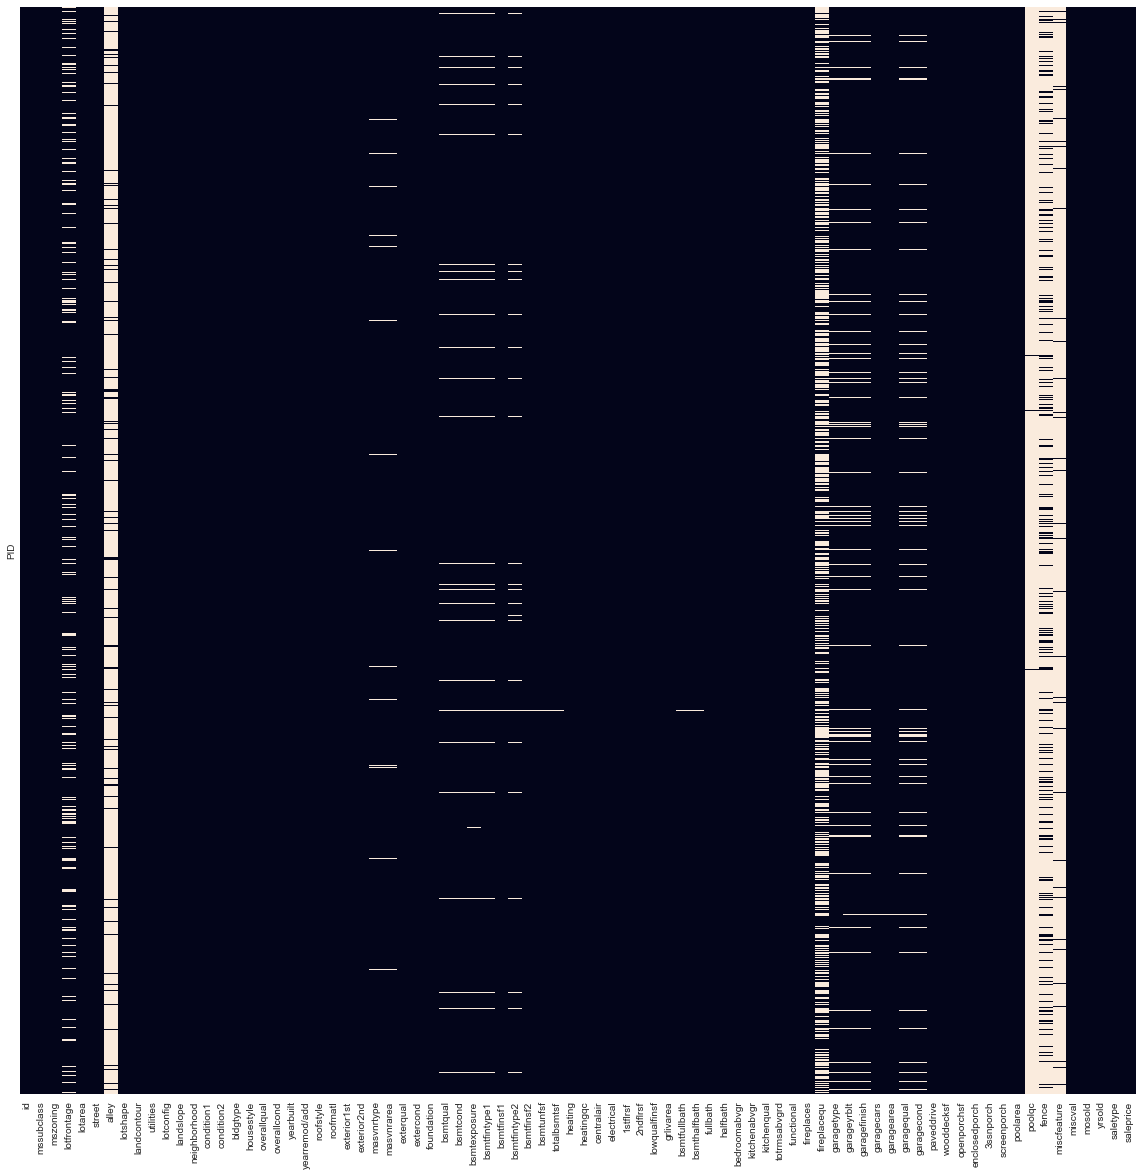

In [8]:
nulldisplay(train)

#### Null Values: alley, fence, miscfeature, poolqc, fireplacequ
In the data dictionary, NA for these 4 columns indicate the houses have no such feature.

We can replace the null values with "nil".  

In [9]:
# Check if there are other values that could represent no features
display(train['alley'].unique())
display(train['fence'].unique())
display(train['miscfeature'].unique())
display(train['poolqc'].unique())
display(train['fireplacequ'].unique())

array([nan, 'Pave', 'Grvl'], dtype=object)

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [10]:
# In addition, we check to see if NA for poolqc would show a poolarea of value 0
train[train['poolqc'].isnull()].head()

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                      
533352170  109          60       RL          NaN    13517   Pave   NaN   
531379050  544          60       RL         43.0    11492   Pave   NaN   
535304180  153          20       RL         68.0     7922   Pave   NaN   
916386060  318          60       RL         73.0     9802   Pave   NaN   
906425045  255          50       RL         82.0    14235   Pave   NaN   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
533352170      IR1         Lvl    AllPub   CulDSac       Gtl       Sawyer   
531379050      IR1         Lvl    AllPub   CulDSac       Gtl      SawyerW   
535304180      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
916386060      Reg         Lvl    AllPub    Inside       Gtl       Timber   
906425045      IR1         Lvl    AllPub    Inside       Gtl      SawyerW   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
533352170       RRAe       Norm     1Fam     2Story            6            8   
531379050       Norm       Norm     1Fam     2Story            7            5   
535304180       Norm       Norm     1Fam     1Story            5            7   
916386060       Norm       Norm     1Fam     2Story            5            5   
906425045       Norm       Norm     1Fam     1.5Fin            6            8   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
533352170       1976           2005     Gable  CompShg     HdBoard   
531379050       1996           1997     Gable  CompShg     VinylSd   
535304180       1953           2007     Gable  CompShg     VinylSd   
916386060       2006           2007     Gable  CompShg     VinylSd   
906425045       1900           1993     Gable  CompShg     Wd Sdng   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
533352170     Plywood    BrkFace       289.0        Gd        TA     CBlock   
531379050     VinylSd    BrkFace       132.0        Gd        TA      PConc   
535304180     VinylSd       None         0.0        TA        Gd     CBlock   
916386060     VinylSd       None         0.0        TA        TA      PConc   
906425045     Plywood       None         0.0        TA        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
533352170       TA       TA           No          GLQ       533.0   
531379050       Gd       TA           No          GLQ       637.0   
535304180       TA       TA           No          GLQ       731.0   
916386060       Gd       TA           No          Unf         0.0   
906425045       Fa       Gd           No          Unf         0.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
533352170          Unf         0.0      192.0        725.0    GasA        Ex   
531379050          Unf         0.0      276.0        913.0    GasA        Ex   
535304180          Unf         0.0      326.0       1057.0    GasA        TA   
916386060          Unf         0.0      384.0        384.0    GasA        Gd   
906425045          Unf         0.0      676.0        676.0    GasA        TA   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
533352170          Y      SBrkr       725       754             0       1479   
531379050          Y      SBrkr       913      1209    

In [11]:
# Replacing nulls in the 4 columns mentioned 

train[['alley', 'fence', 'miscfeature', 'poolqc', 'fireplacequ']] = train[['alley', 'fence', 'miscfeature', 'poolqc', 'fireplacequ']].fillna(value="NA")

lotfrontage
Null values: 330
Percent null: 16.09%.

masvnrtype
Null values: 22
Percent null: 1.07%.

masvnrarea
Null values: 22
Percent null: 1.07%.

bsmtqual
Null values: 55
Percent null: 2.68%.

bsmtcond
Null values: 55
Percent null: 2.68%.

bsmtexposure
Null values: 58
Percent null: 2.83%.

bsmtfintype1
Null values: 55
Percent null: 2.68%.

bsmtfinsf1
Null values: 1
Percent null: 0.05%.

bsmtfintype2
Null values: 56
Percent null: 2.73%.

bsmtfinsf2
Null values: 1
Percent null: 0.05%.

bsmtunfsf
Null values: 1
Percent null: 0.05%.

totalbsmtsf
Null values: 1
Percent null: 0.05%.

bsmtfullbath
Null values: 2
Percent null: 0.1%.

bsmthalfbath
Null values: 2
Percent null: 0.1%.

garagetype
Null values: 113
Percent null: 5.51%.

garageyrblt
Null values: 114
Percent null: 5.56%.

garagefinish
Null values: 114
Percent null: 5.56%.

garagecars
Null values: 1
Percent null: 0.05%.

garagearea
Null values: 1
Percent null: 0.05%.

garagequal
Null values: 114
Percent null: 5.56%.

garagecond
Nul

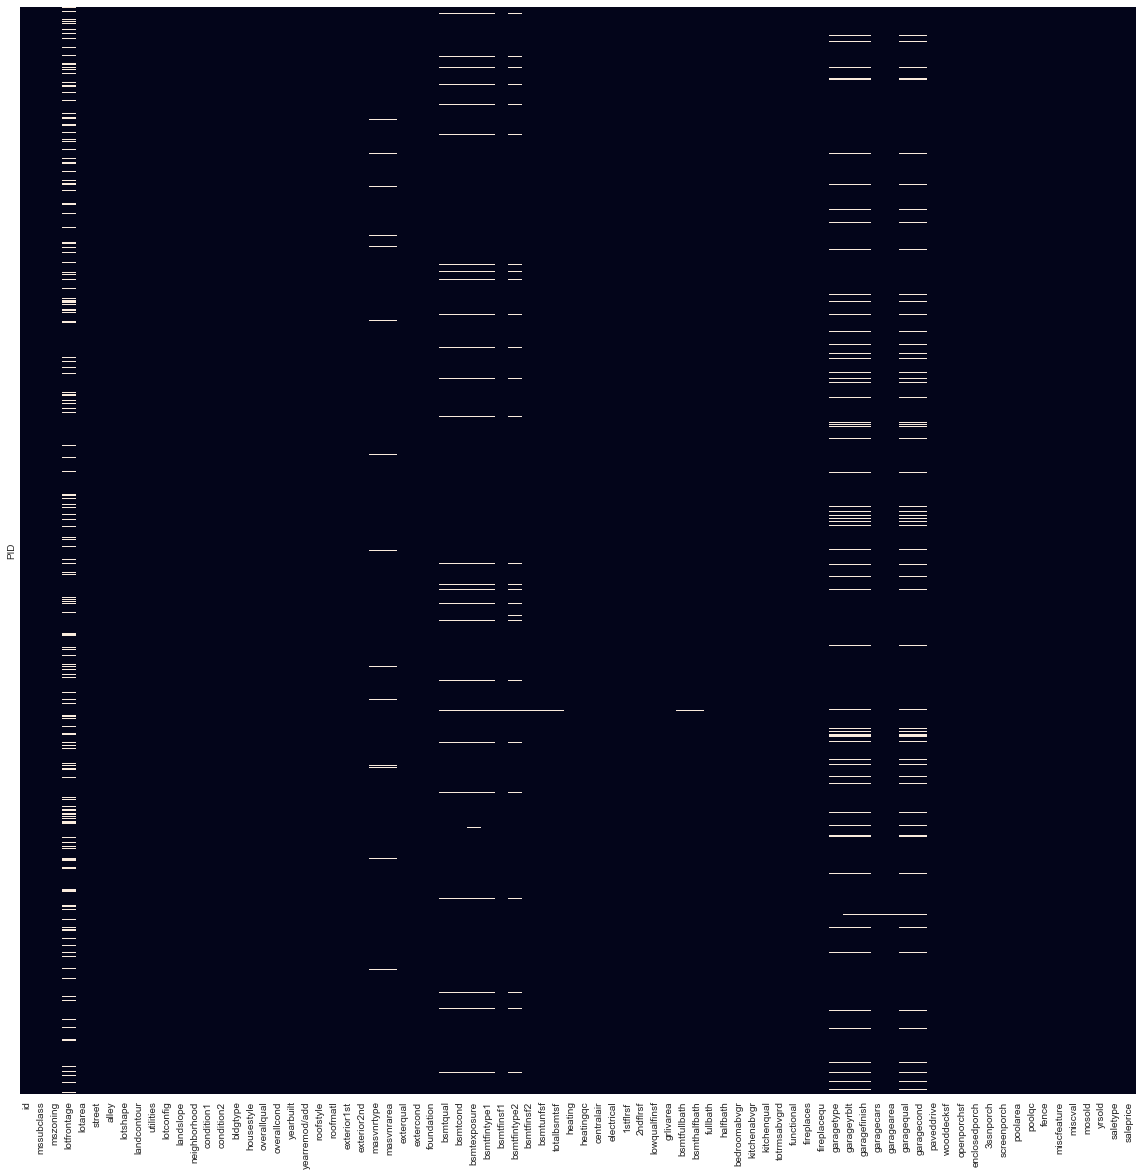

In [12]:
# check if values are replaced
nulldisplay(train)

#### Null Values: Related to Garage
* garagetype (NA = no garage)
* garageyrblt
* garagefinish
* garagecars
* garagearea
* garagequal
* garagecond

In [13]:
# Check garagetype column first, if NA

display(train['garagetype'].unique())

# Replace garagetype with "NA" for missing values
train[['garagetype']] = train[['garagetype']].fillna(value="NA")

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [14]:
# when checking to see if NA for garagetype would show a garagearea of value 0, 
# we found 1 row with missing values that we will not have enough information to impute 
train[train['garagearea'].isnull()]

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                       
910201180  2237          70       RM         50.0     9060   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
910201180      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
910201180       Norm       Norm     1Fam     2Story            5            6   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
910201180       1923           1999     Gable  CompShg     Wd Sdng   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
910201180     Plywood       None         0.0        TA        TA     BrkTil   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
910201180       Gd       TA           No          ALQ       548.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
910201180          Unf         0.0      311.0        859.0    GasA        Ex   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
910201180          Y      SBrkr       942       886             0       1828   

           bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
PID                                                                       
910201180           0.0           0.0         2         0             3   

           kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces  \
PID                                                                        
910201180             1          Gd             6        Typ           0   

          fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
PID                                                                      
910201180          NA     Detchd          NaN          NaN         NaN   

           garagearea garagequal garagecond paveddrive  wooddecksf  \
PID                                                                  
910201180         NaN        NaN        NaN          Y         174   

           openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  \
PID                                                                       
910201180            0            212          0            0         0   

          poolqc  fence miscfeature  miscval  mosold  yrsold saletype  \
PID                                                                     
910201180     NA  MnPrv          NA        0       3    2007      WD    

           saleprice  
PID                   
910201180     150909

In [15]:
# choose to drop row with pid = 910201180
train = train.drop([910201180])

# this also removes the null row values in garagecars and garagearea

In [16]:
# Replace with "NA" as no garage is present for categorical columns

train[['garagefinish']] = train[['garagefinish']].fillna(value="NA")
train[['garagequal']] = train[['garagequal']].fillna(value="NA")
train[['garagecond']] = train[['garagecond']].fillna(value="NA")

# Replace with 0
train[['garageyrblt']] = train[['garageyrblt']].fillna(value=0)

lotfrontage
Null values: 330
Percent null: 16.09%.

masvnrtype
Null values: 22
Percent null: 1.07%.

masvnrarea
Null values: 22
Percent null: 1.07%.

bsmtqual
Null values: 55
Percent null: 2.68%.

bsmtcond
Null values: 55
Percent null: 2.68%.

bsmtexposure
Null values: 58
Percent null: 2.83%.

bsmtfintype1
Null values: 55
Percent null: 2.68%.

bsmtfinsf1
Null values: 1
Percent null: 0.05%.

bsmtfintype2
Null values: 56
Percent null: 2.73%.

bsmtfinsf2
Null values: 1
Percent null: 0.05%.

bsmtunfsf
Null values: 1
Percent null: 0.05%.

totalbsmtsf
Null values: 1
Percent null: 0.05%.

bsmtfullbath
Null values: 2
Percent null: 0.1%.

bsmthalfbath
Null values: 2
Percent null: 0.1%.



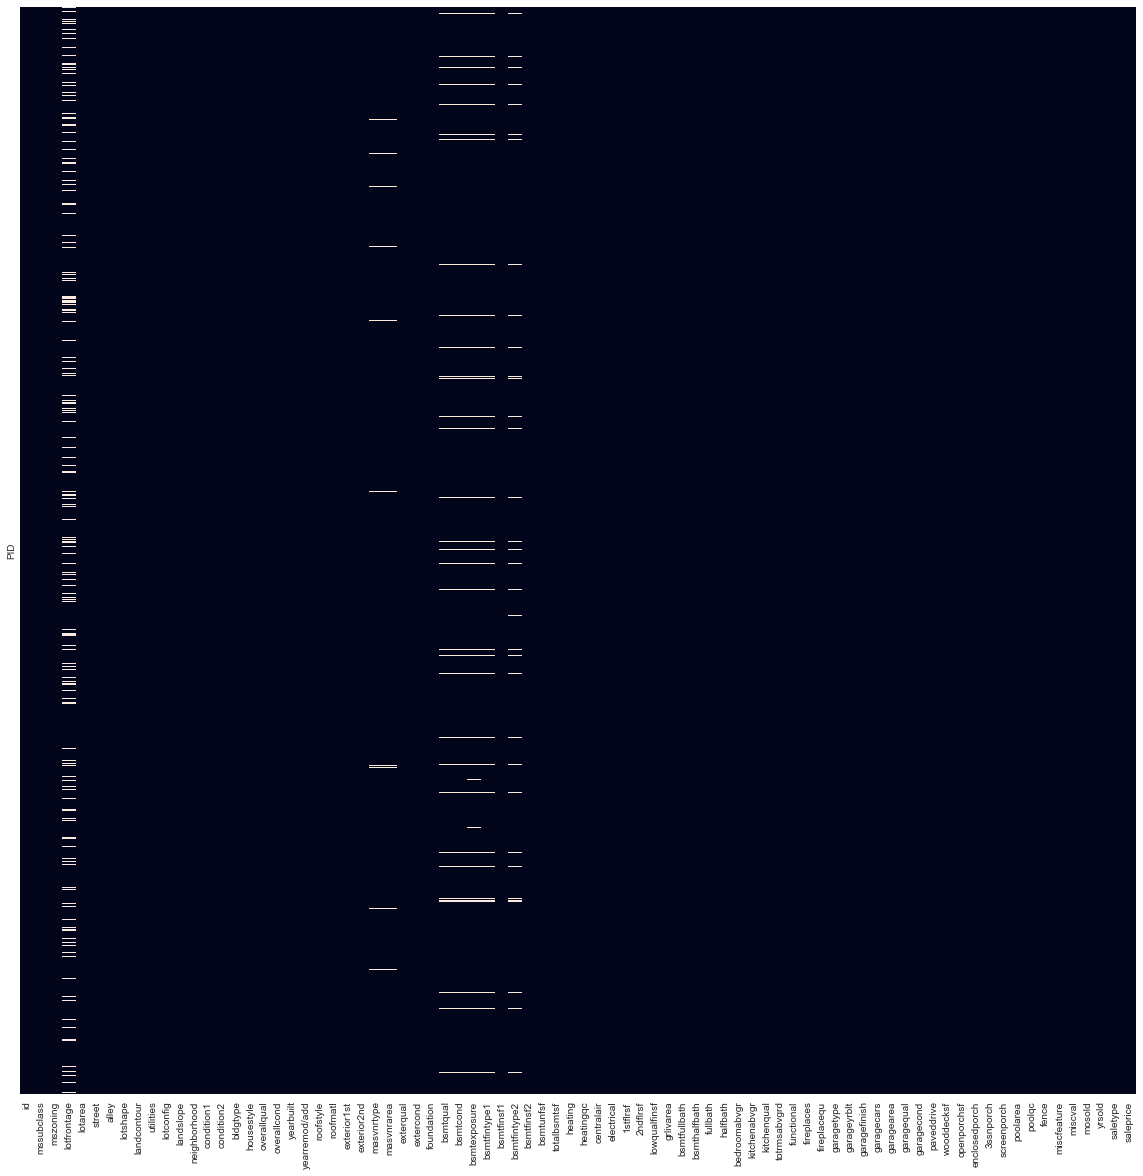

In [17]:
nulldisplay(train)

#### Null Values: Related to Masonry
* masvnrtype (None = no masonry)
* masvnrarea

In [18]:
train[train['masvnrtype'].isnull()]

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                       
528142010  2393          60       RL        103.0    12867   Pave    NA   
528110050  2383          20       RL        107.0    13891   Pave    NA   
531371050   539          20       RL         67.0    10083   Pave    NA   
528458020   518          20       FV         90.0     7993   Pave    NA   
908130020  2824          20       RL         75.0     8050   Pave    NA   
528458150  1800          60       FV        112.0    12217   Pave    NA   
907251090  1455          60       RL         75.0     9473   Pave    NA   
528439010  1120          20       RL         87.0    10037   Pave    NA   
533208040  1841         120       FV         35.0     4274   Pave  Pave   
533208030  1840         120       FV         30.0     5330   Pave  Pave   
909475070  2230          20       RL          NaN    32668   Pave    NA   
528462040  1123          20       FV         95.0    11639   Pave    NA   
528435010  1784          20       RL         85.0     9965   Pave    NA   
528275160   485          60       RL          NaN    12891   Pave    NA   
528250010  1752          80       RL          NaN    11950   Pave    NA   
534104100  1185          60       FV          NaN     7500   Pave    NA   
528480160  1128          60       FV         65.0     8125   Pave    NA   
528290090  1096          60       RL          NaN     7750   Pave    NA   
916384070  2261          20       RL         68.0     8298   Pave    NA   
528429100  2456          20       RL         49.0    15218   Pave    NA   
528218010  1728          60       RL         59.0    15810   Pave    NA   
528240070    56          60       RL          NaN     7851   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
528142010      IR1         Lvl    AllPub    Corner       Gtl      NridgHt   
528110050      Reg         Lvl    AllPub    Inside       Gtl      NridgHt   
531371050      Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
528458020      IR1         Lvl    AllPub    Inside       Gtl      Somerst   
908130020      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
528458150      IR1         Lvl    AllPub    Inside       Gtl      Somerst   
907251090      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
528439010      Reg         Lvl    AllPub    Corner       Gtl      Somerst   
533208040      IR1         Lvl    AllPub    Inside       Gtl      Somerst   
533208030      IR2         Lvl    AllPub    Inside       Gtl      Somerst   
909475070      IR1         Lvl    AllPub   CulDSac       Gtl      Crawfor   
528462040      Reg         Lvl    AllPub    Corner       Gtl      Somerst   
528435010      Reg         Lvl    AllPub       FR2       Gtl      Somerst   
528275160      IR1         Lvl    AllPub    Corner       Gtl      Gilbert   
528250010      IR1         Lvl    AllPub    Corner       Gtl      Gilbert   
534104100      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
528480160      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
528290090      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
916384070      IR1         HLS    AllPub    Inside       Gtl       Timber   
528429100      IR1         Lvl    AllPub   CulDSac       Gtl      Somerst   
528218010      IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
528240070      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
528142010       Norm       Norm     1Fam     2Story            8            5   
528110050       Norm       Norm     1Fam     1Story           10            5   
531371050       Norm       Norm     1Fa

In [19]:
train[train['masvnrtype']=='None']

# None - corresponds with masvnrarea of 0.0
# Assume that null values are houses with no masonry, replace with None and 0 for type and area

train[['masvnrtype']] = train[['masvnrtype']].fillna(value="None")
train[['masvnrarea']] = train[['masvnrarea']].fillna(value=0.0)

lotfrontage
Null values: 330
Percent null: 16.09%.

bsmtqual
Null values: 55
Percent null: 2.68%.

bsmtcond
Null values: 55
Percent null: 2.68%.

bsmtexposure
Null values: 58
Percent null: 2.83%.

bsmtfintype1
Null values: 55
Percent null: 2.68%.

bsmtfinsf1
Null values: 1
Percent null: 0.05%.

bsmtfintype2
Null values: 56
Percent null: 2.73%.

bsmtfinsf2
Null values: 1
Percent null: 0.05%.

bsmtunfsf
Null values: 1
Percent null: 0.05%.

totalbsmtsf
Null values: 1
Percent null: 0.05%.

bsmtfullbath
Null values: 2
Percent null: 0.1%.

bsmthalfbath
Null values: 2
Percent null: 0.1%.



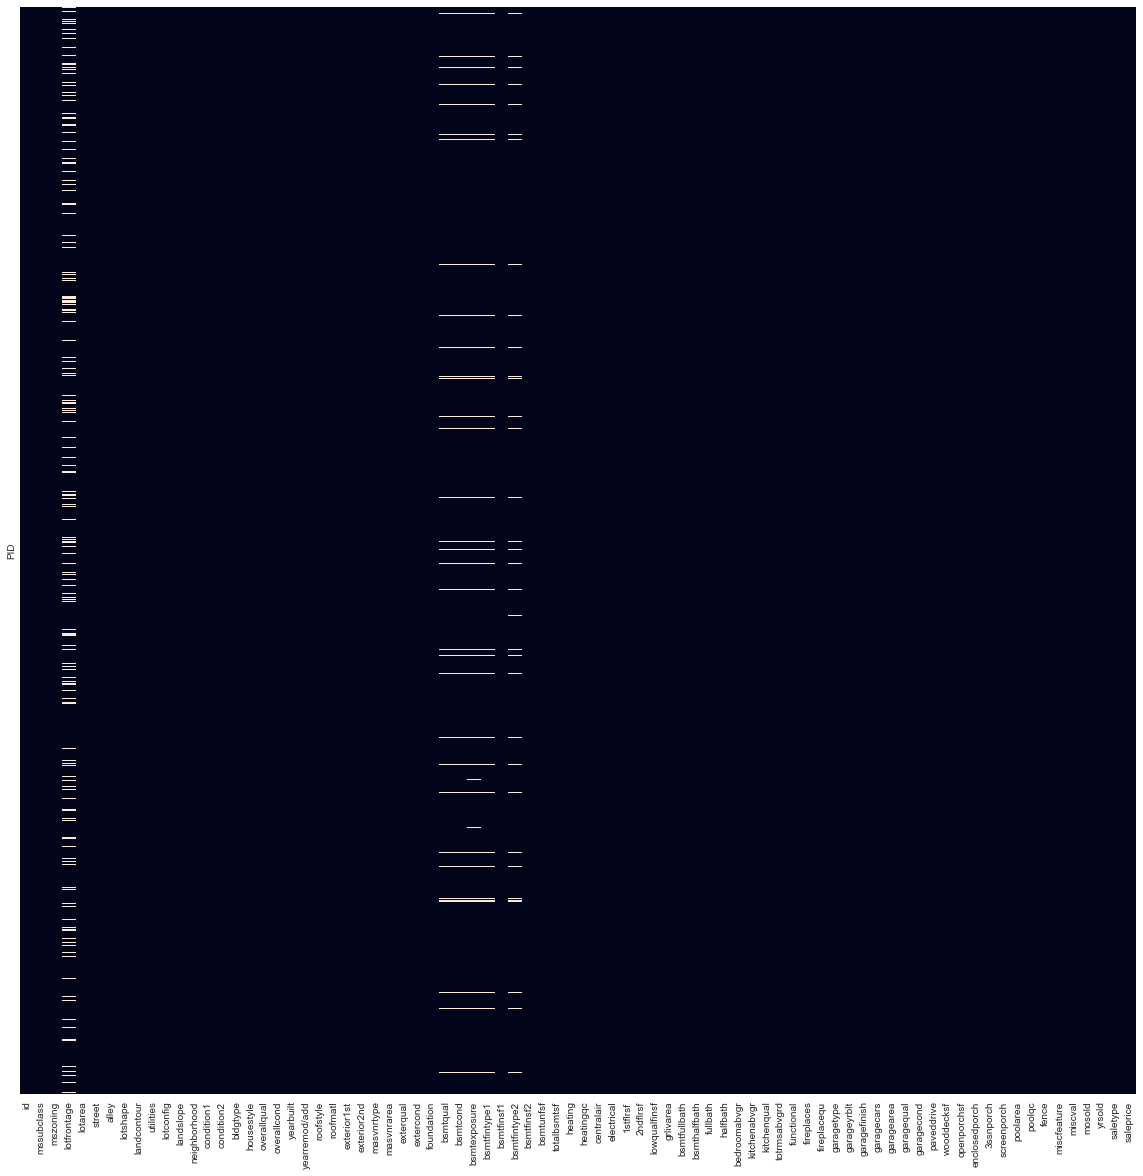

In [20]:
nulldisplay(train)

#### Null Values: Related to Basements
* bsmtqual
* bsmtcond
* bsmtexposure
* bsmtfintype1
* bsmtfinsf1
* bsmtfintype2
* bsmtfinsf2
* bsmtunfsf
* totalbsmtsf
* bsmtfullbath
* bsmthalfbath

In [21]:
# investigate the 1 null value in bsmtfinsf1

train[train['bsmtfinsf1'].isnull()]

# all the columns related to basements are null, deduce that this house does not have a basement
# replace values with NA (categorical) and 0 (non-categorical)

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                       
903230120  1342          20       RM         99.0     5940   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
903230120      IR1         Lvl    AllPub       FR3       Gtl      BrkSide   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
903230120      Feedr       Norm     1Fam     1Story            4            7   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
903230120       1946           1950     Gable  CompShg     MetalSd   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
903230120      CBlock       None         0.0        TA        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
903230120      NaN      NaN          NaN          NaN         NaN   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
903230120          NaN         NaN        NaN          NaN    GasA        TA   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
903230120          Y      FuseA       896         0             0        896   

           bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
PID                                                                       
903230120           NaN           NaN         1         0             2   

           kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces  \
PID                                                                        
903230120             1          TA             4        Typ           0   

          fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
PID                                                                      
903230120          NA     Detchd       1946.0          Unf         1.0   

           garagearea garagequal garagecond paveddrive  wooddecksf  \
PID                                                                  
903230120       280.0         TA         TA          Y           0   

           openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  \
PID                                                                       
903230120            0              0          0            0         0   

          poolqc  fence miscfeature  miscval  mosold  yrsold saletype  \
PID                                                                     
903230120     NA  MnPrv          NA        0       4    2008    ConLD   

           saleprice  
PID                   
903230120      79000

In [22]:
repl_0 = ['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'bsmtfullbath', 'bsmthalfbath']
repl_na = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2']


train.loc[903230120, repl_0] = train.loc[903230120, repl_0].fillna(0)
train.loc[903230120, repl_na] = train.loc[903230120, repl_na].fillna('NA')

In [23]:
train.loc[[903230120]]

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                       
903230120  1342          20       RM         99.0     5940   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
903230120      IR1         Lvl    AllPub       FR3       Gtl      BrkSide   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
903230120      Feedr       Norm     1Fam     1Story            4            7   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
903230120       1946           1950     Gable  CompShg     MetalSd   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
903230120      CBlock       None         0.0        TA        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
903230120       NA       NA           NA           NA         0.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
903230120           NA         0.0        0.0          0.0    GasA        TA   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
903230120          Y      FuseA       896         0             0        896   

           bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
PID                                                                       
903230120           0.0           0.0         1         0             2   

           kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces  \
PID                                                                        
903230120             1          TA             4        Typ           0   

          fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
PID                                                                      
903230120          NA     Detchd       1946.0          Unf         1.0   

           garagearea garagequal garagecond paveddrive  wooddecksf  \
PID                                                                  
903230120       280.0         TA         TA          Y           0   

           openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  \
PID                                                                       
903230120            0              0          0            0         0   

          poolqc  fence miscfeature  miscval  mosold  yrsold saletype  \
PID                                                                     
903230120     NA  MnPrv          NA        0       4    2008    ConLD   

           saleprice  
PID                   
903230120      79000

lotfrontage
Null values: 330
Percent null: 16.09%.

bsmtqual
Null values: 54
Percent null: 2.63%.

bsmtcond
Null values: 54
Percent null: 2.63%.

bsmtexposure
Null values: 57
Percent null: 2.78%.

bsmtfintype1
Null values: 54
Percent null: 2.63%.

bsmtfintype2
Null values: 55
Percent null: 2.68%.

bsmtfullbath
Null values: 1
Percent null: 0.05%.

bsmthalfbath
Null values: 1
Percent null: 0.05%.



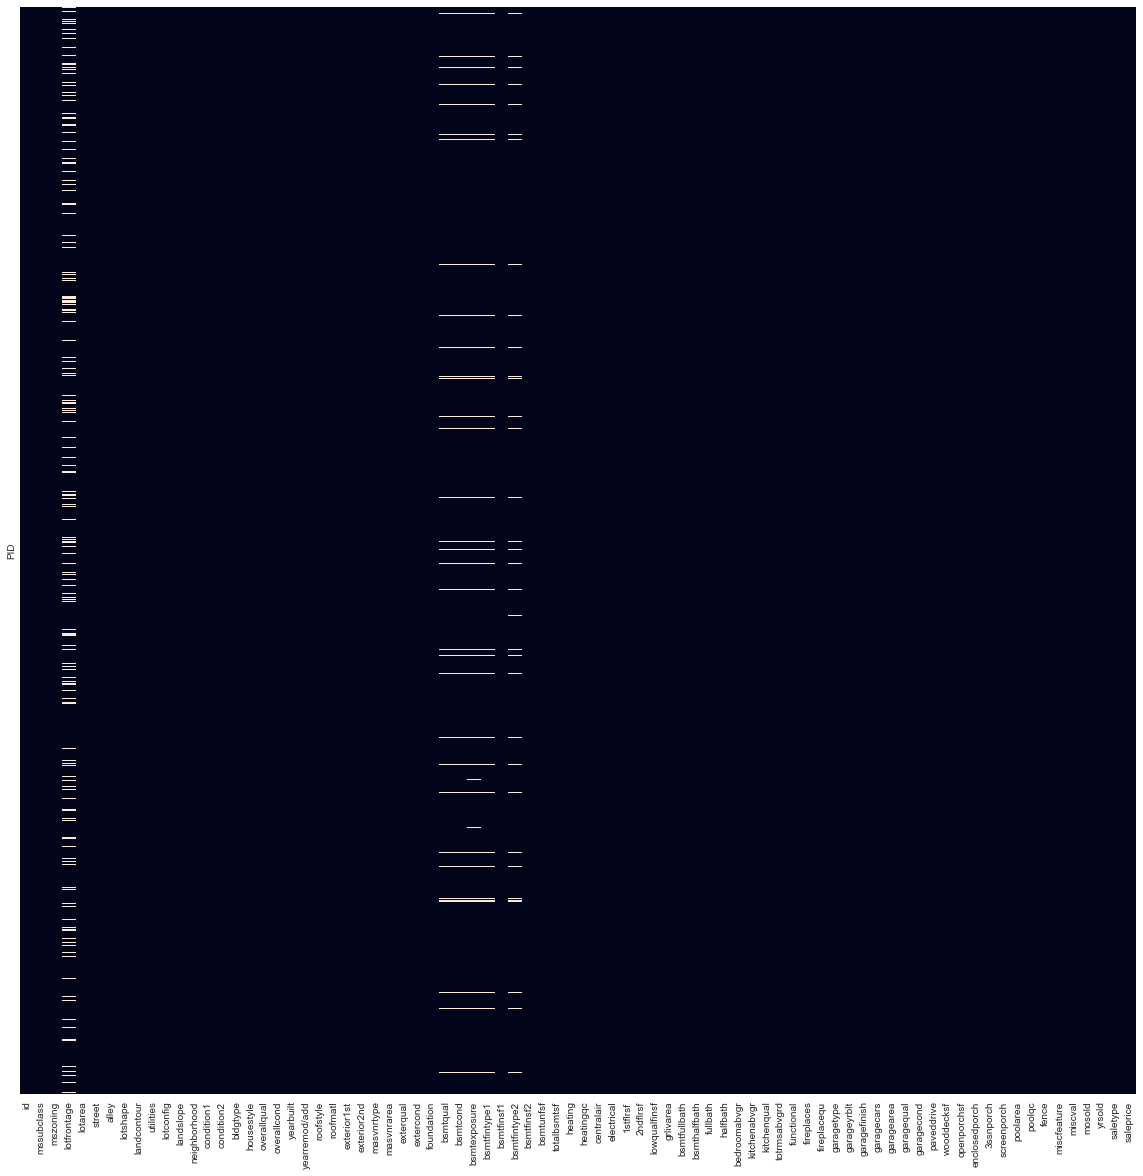

In [24]:
nulldisplay(train)

In [25]:
# taking a look at the 54 null values in bsmtcond, bsmtqual and bsmtfintype1

train[train['bsmtfintype1'].isnull()].head()
train[train['bsmtfintype1'].isnull()].index

# we can see that for the following Id numbers, there are null values for bsmtqual, bsmtcond
# bsmtexposure, bsmtfintyp1 and bsmtfintype2 

Int64Index([906226060, 906226100, 905228050, 908128060, 910251050, 905451050,
            910206010, 905477010, 532351140, 908201100, 535327140, 906226110,
            905475520, 908204160, 912251110, 908154080, 923125030, 914476020,
            908102060, 903454060, 905402070, 535451170, 534276190, 535375140,
            535450160, 904101170, 535451190, 534252070, 904301410, 908152180,
            902205010, 535383100, 535454050, 908225370, 916252170, 902427045,
            905478190, 906226120, 914476080, 535353060, 905101330, 905402060,
            534450090, 904100170, 908201110, 906226140, 534429030, 902427140,
            535454060, 535454030, 923202220, 906226090, 527226010, 911175410],
           dtype='int64', name='PID')

In [26]:
indexes = [906226060, 906226100, 905228050, 908128060, 910251050, 905451050,
            910206010, 905477010, 532351140, 908201100, 535327140, 906226110,
            905475520, 908204160, 912251110, 908154080, 923125030, 914476020,
            908102060, 903454060, 905402070, 535451170, 534276190, 535375140,
            535450160, 904101170, 535451190, 534252070, 904301410, 908152180,
            902205010, 535383100, 535454050, 908225370, 916252170, 902427045,
            905478190, 906226120, 914476080, 535353060, 905101330, 905402060,
            534450090, 904100170, 908201110, 906226140, 534429030, 902427140,
            535454060, 535454030, 923202220, 906226090, 527226010, 911175410]

train.loc[indexes, repl_0] = train.loc[indexes, repl_0].fillna(0)
train.loc[indexes, repl_na] = train.loc[indexes, repl_na].fillna('NA')

lotfrontage
Null values: 330
Percent null: 16.09%.

bsmtexposure
Null values: 3
Percent null: 0.15%.

bsmtfintype2
Null values: 1
Percent null: 0.05%.



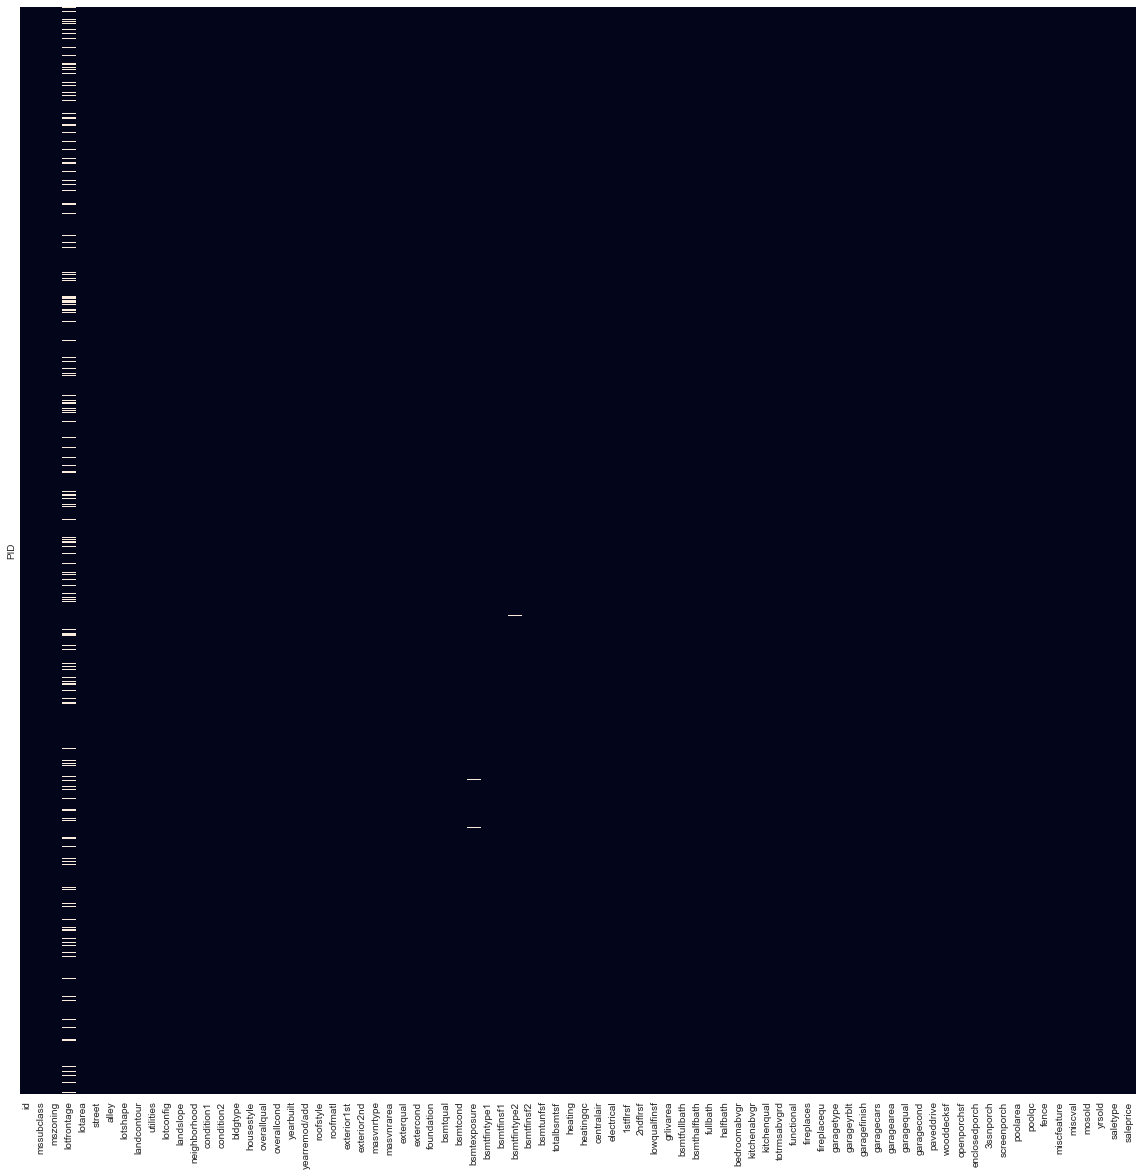

In [27]:
nulldisplay(train)

In [28]:
# investigate the remaining null values 

display(train[train['bsmtexposure'].isnull()])
train['bsmtexposure'].value_counts()

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                       
528458090  1797          60       FV         81.0    10411   Pave    NA   
528445060    67          20       RL         73.0     8987   Pave    NA   
907194130  2780          60       RL         65.0    14006   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
528458090      Reg         Lvl    AllPub    Corner       Gtl      Somerst   
528445060      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
907194130      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
528458090       Norm       Norm     1Fam     2Story            5            5   
528445060       Norm       Norm     1Fam     1Story            8            5   
907194130       Norm       Norm     1Fam     2Story            7            5   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
528458090       2007           2007     Gable  CompShg     VinylSd   
528445060       2005           2006     Gable  CompShg     VinylSd   
907194130       2002           2002     Gable  CompShg     VinylSd   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
528458090     VinylSd       None         0.0        Gd        TA     CBlock   
528445060     VinylSd    BrkFace       226.0        Gd        TA      PConc   
907194130     VinylSd    BrkFace       144.0        Gd        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
528458090       Gd       TA          NaN          Unf         0.0   
528445060       Gd       TA          NaN          Unf         0.0   
907194130       Gd       TA          NaN          Unf         0.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
528458090          Unf         0.0      725.0        725.0    GasA        Ex   
528445060          Unf         0.0     1595.0       1595.0    GasA        Ex   
907194130          Unf         0.0      936.0        936.0    GasA        Ex   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
528458090          Y      SBrkr       725       863             0       1588   
528445060          Y      SBrkr      1595         0             0       1595   
907194130          Y      SBrkr       936       840             0       1776   

           bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
PID                                                                       
528458090           0.0           0.0         3         0             3   
528445060           0.0           0.0         2         0             2   
907194130           0.0           0.0         2         1             3   

           kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces  \
PID                                                                        
528458090             1          Gd             8        Typ           0   
528445060             1          Gd             6        Typ           1   
907194130             1          Gd             7        Typ           1   

          fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
PID                                                                      
528458090          NA     Attchd       2007.0

No    1338
Av     288
Gd     203
Mn     163
NA      55
Name: bsmtexposure, dtype: int64

In [29]:
# totalbsmtsf is not 0 for these 3 rows, indicating that there is indeed a basement 
# to replace with 'No' as this is the most common input

train.loc[[528458090, 528445060, 907194130], 'bsmtexposure'] = train.loc[[528458090, 528445060, 907194130], 'bsmtexposure'].fillna('No')

In [30]:
display(train[train['bsmtfintype2'].isnull()])
train['bsmtfintype2'].value_counts()

id  mssubclass mszoning  lotfrontage  lotarea street alley  \
PID                                                                      
528142130  445          20       RL         85.0    10655   Pave    NA   

          lotshape landcontour utilities lotconfig landslope neighborhood  \
PID                                                                         
528142130      IR1         Lvl    AllPub    Inside       Gtl      NridgHt   

          condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
PID                                                                             
528142130       Norm       Norm     1Fam     1Story            8            5   

           yearbuilt  yearremod/add roofstyle roofmatl exterior1st  \
PID                                                                  
528142130       2003           2004     Gable  CompShg     VinylSd   

          exterior2nd masvnrtype  masvnrarea exterqual extercond foundation  \
PID                                                                           
528142130     VinylSd    BrkFace       296.0        Gd        TA      PConc   

          bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1  \
PID                                                                 
528142130       Gd       TA           No          GLQ      1124.0   

          bsmtfintype2  bsmtfinsf2  bsmtunfsf  totalbsmtsf heating heatingqc  \
PID                                                                            
528142130          NaN       479.0     1603.0       3206.0    GasA        Ex   

          centralair electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                            
528142130          Y      SBrkr      1629         0             0       1629   

           bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
PID                                                                       
528142130           1.0           0.0         2         0             3   

           kitchenabvgr kitchenqual  totrmsabvgrd functional  fireplaces  \
PID                                                                        
528142130             1          Gd             7        Typ           1   

          fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
PID                                                                      
528142130          Gd     Attchd       2003.0          RFn         3.0   

           garagearea garagequal garagecond paveddrive  wooddecksf  \
PID                                                                  
528142130       880.0         TA         TA          Y           0   

           openporchsf  enclosedporch  3ssnporch  screenporch  poolarea  \
PID                                                                       
528142130            0              0          0            0         0   

          poolqc fence miscfeature  miscval  mosold  yrsold saletype  \
PID                                                                    
528142130     NA    NA          NA        0      10    2009      WD    

           saleprice  
PID                   
528142130     284000

Unf    1748
Rec      80
LwQ      60
NA       55
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfintype2, dtype: int64

In [31]:
# bsmtfinsf2 is not 0, indicating that basement is not unfinished
# to replace with 'Rec' as this is the most common input after 'Unf'

train.loc[[528142130], 'bsmtfintype2'] = train.loc[[528142130], 'bsmtfintype2'].fillna('Rec')

lotfrontage
Null values: 330
Percent null: 16.09%.



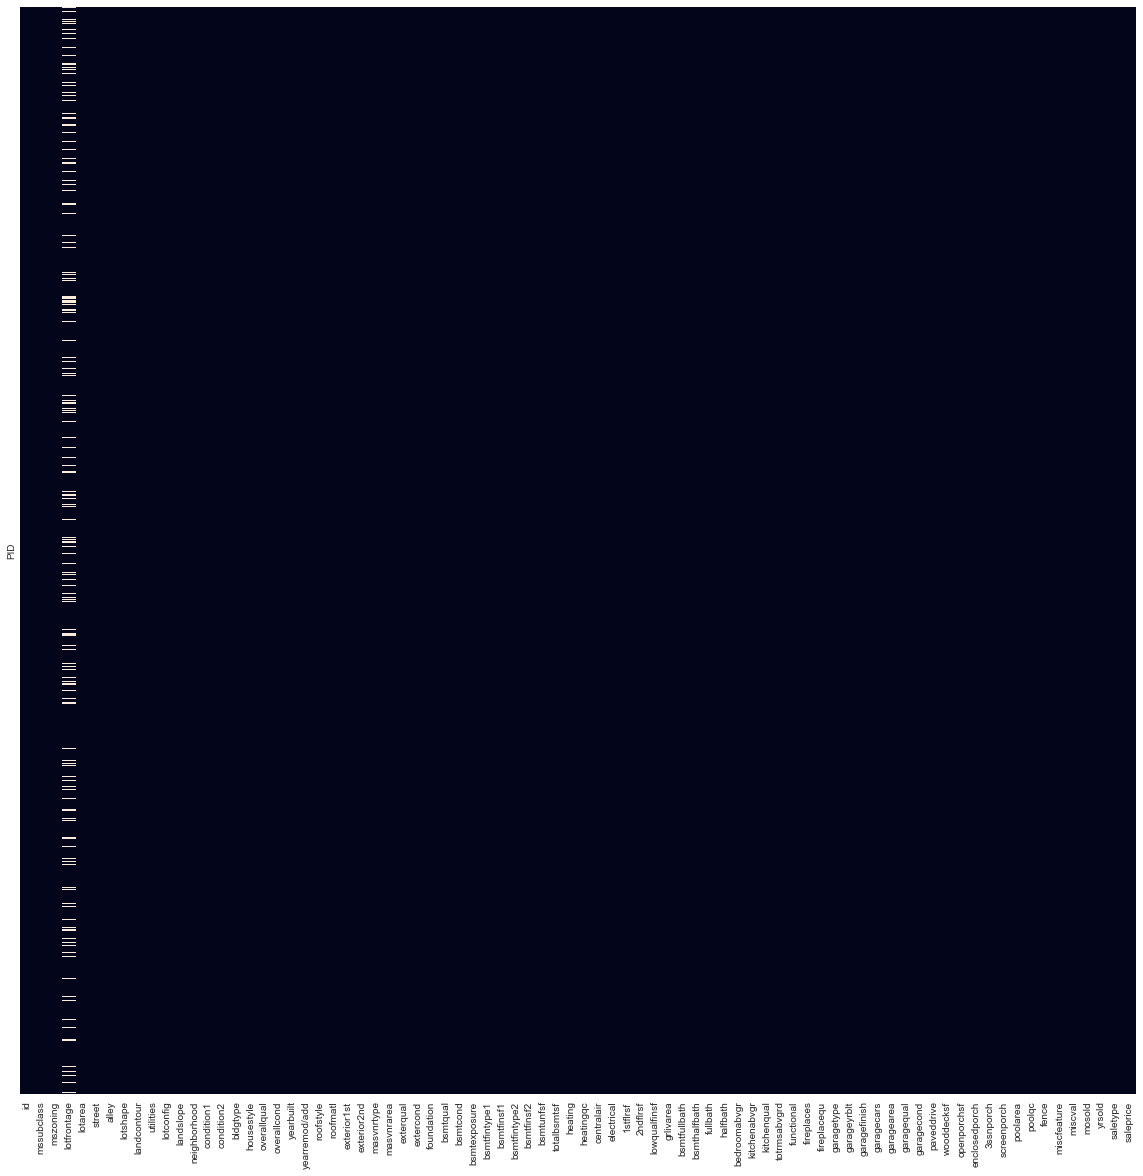

In [32]:
nulldisplay(train)

# one last null value to clean - lotfrontage

#### Null Values: lotfrontage

This refers to the length of street in front of each house, and is mandatory - will not be 0.

There are too many missing values and for ease of data cleaning we will drop this column.

Assume that lotfrontage would depend on how big the house is, which is already captured in other columns. 

In [33]:
train.drop(['lotfrontage'], axis=1, inplace=True)

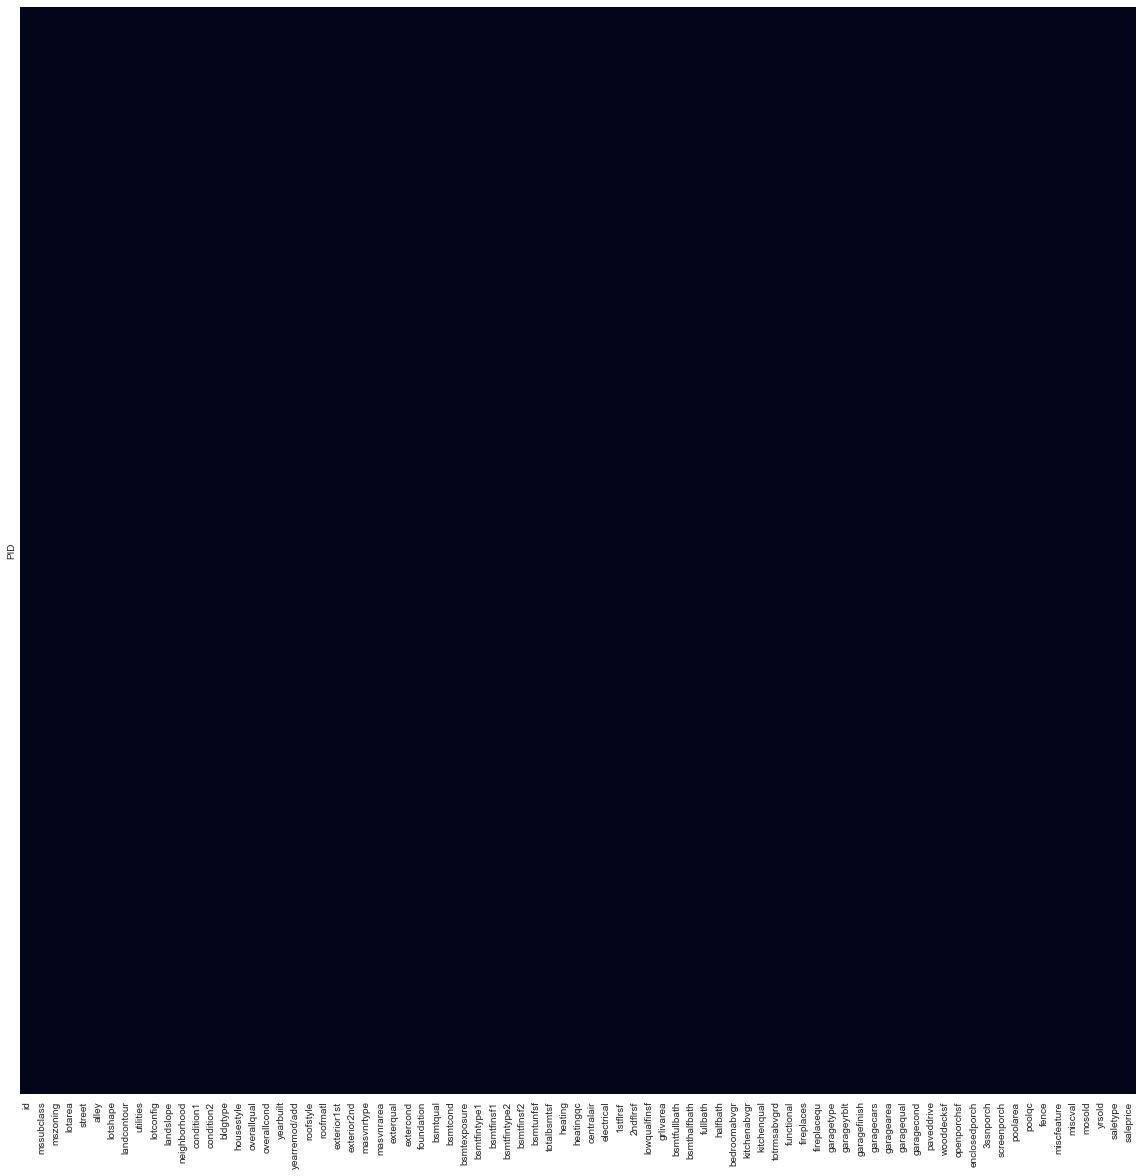

In [34]:
nulldisplay(train) # all null values have been cleaned

### Check data types

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 533352170 to 527162130
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2050 non-null   int64  
 1   mssubclass     2050 non-null   int64  
 2   mszoning       2050 non-null   object 
 3   lotarea        2050 non-null   int64  
 4   street         2050 non-null   object 
 5   alley          2050 non-null   object 
 6   lotshape       2050 non-null   object 
 7   landcontour    2050 non-null   object 
 8   utilities      2050 non-null   object 
 9   lotconfig      2050 non-null   object 
 10  landslope      2050 non-null   object 
 11  neighborhood   2050 non-null   object 
 12  condition1     2050 non-null   object 
 13  condition2     2050 non-null   object 
 14  bldgtype       2050 non-null   object 
 15  housestyle     2050 non-null   object 
 16  overallqual    2050 non-null   int64  
 17  overallcond    2050 non-null   int64  


In [36]:
# change other feature types to int and float respectively depending on feature description

train = train.astype(
    {
        "bsmtfullbath": int,
        "bsmthalfbath": int,
        "garagecars": int,
        "lotarea": float,
        "1stflrsf": float,
        "2ndflrsf": float,
        "lowqualfinsf": float,
        "miscval": float,
        "poolarea": float,
        "wooddecksf": float,
        "openporchsf": float,
        "enclosedporch": float,
        "3ssnporch": float,
        "screenporch": float,
        "saleprice": float,
        "grlivarea":float, 
        "garageyrblt":int
    }
)

### Look more in depth into Data Types - Nominal, Ordinal, Discrete and Conitnuous
Create separate data frames for continuous and discrete variables to look at univariate and bivariate analysis (EDA)

In [37]:
pd.set_option('display.max_row', 80)
train.nunique().sort_values(ascending=False)

id               2050
lotarea          1476
grlivarea        1053
bsmtunfsf         966
1stflrsf          914
totalbsmtsf       892
saleprice         827
bsmtfinsf1        821
garagearea        514
2ndflrsf          504
masvnrarea        373
wooddecksf        321
openporchsf       223
bsmtfinsf2        205
enclosedporch     159
yearbuilt         113
garageyrblt       101
screenporch       100
yearremod/add      61
lowqualfinsf       31
miscval            28
neighborhood       28
3ssnporch          22
mssubclass         16
exterior1st        15
exterior2nd        15
totrmsabvgrd       14
mosold             12
overallqual        10
poolarea           10
overallcond         9
condition1          9
saletype            9
bedroomabvgr        8
functional          8
condition2          8
housestyle          8
bsmtfintype2        7
bsmtfintype1        7
garagetype          7
mszoning            7
miscfeature         6
garagecond          6
roofmatl            6
foundation          6
garagequal

#### Discrete Features


In [38]:
# we can see that discrete variables are of the 'int' data type, except column mssubclass

discrete = []
for x in train.columns: 
    if train[x].dtype == np.int64 and x!= 'mssubclass' and x!= 'overallqual'and x!= 'overallcond':
        discrete.append(x)

# remove id 
discrete.remove('id')

train[discrete].head()

yearbuilt  yearremod/add  bsmtfullbath  bsmthalfbath  fullbath  \
PID                                                                         
533352170       1976           2005             0             0         2   
531379050       1996           1997             1             0         2   
535304180       1953           2007             1             0         1   
916386060       2006           2007             0             0         2   
906425045       1900           1993             0             0         2   

           halfbath  bedroomabvgr  kitchenabvgr  totrmsabvgrd  fireplaces  \
PID                                                                         
533352170         1             3             1             6           0   
531379050         1             4             1             8           1   
535304180         0             3             1             5           0   
916386060         1             3             1             7           0   
906425045         0             3             1             6           0   

           garageyrblt  garagecars  mosold  yrsold  
PID                                                 
533352170         1976           2       3    2010  
531379050         1997           2       4    2009  
535304180         1953           1       1    2010  
916386060         2007           2       4    2010  
906425045         1957           2       3    2010

#### Continuous Features

In [39]:
# these would be of the float type
# exclude sale price as that is what we are predicting

conti = []
for x in train.columns: 
    if train[x].dtype == np.float64 and x != 'saleprice':
        conti.append(x)

train[conti].head()

lotarea  masvnrarea  bsmtfinsf1  bsmtfinsf2  bsmtunfsf  \
PID                                                                 
533352170  13517.0       289.0       533.0         0.0      192.0   
531379050  11492.0       132.0       637.0         0.0      276.0   
535304180   7922.0         0.0       731.0         0.0      326.0   
916386060   9802.0         0.0         0.0         0.0      384.0   
906425045  14235.0         0.0         0.0         0.0      676.0   

           totalbsmtsf  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                   
533352170        725.0     725.0     754.0           0.0     1479.0   
531379050        913.0     913.0    1209.0           0.0     2122.0   
535304180       1057.0    1057.0       0.0           0.0     1057.0   
916386060        384.0     744.0     700.0           0.0     1444.0   
906425045        676.0     831.0     614.0           0.0     1445.0   

           garagearea  wooddecksf  openporchsf  enclosedporch  3ssnporch  \
PID                                                                        
533352170       475.0         0.0         44.0            0.0        0.0   
531379050       559.0         0.0         74.0            0.0        0.0   
535304180       246.0         0.0         52.0            0.0        0.0   
916386060       400.0       100.0          0.0            0.0        0.0   
906425045       484.0         0.0         59.0            0.0        0.0   

           screenporch  poolarea  miscval  
PID                                        
533352170          0.0       0.0      0.0  
531379050          0.0       0.0      0.0  
535304180          0.0       0.0      0.0  
916386060          0.0       0.0      0.0  
906425045          0.0       0.0      0.0

#### Nominal Features

In [40]:
# these would be object type
# have 2 - 16 unique inputs, with the exception of neighborhood which will be manually added
# also exclude certain words that are associated with ordinal feautres - like condition and quality

nominal = []
for x in train.columns:
    if (
        train[x].dtype == np.object
        and train[x].nunique() < 16
        and "cond" not in x
        and "qual" not in x
        and "qc" not in x
    ):
        nominal.append(x)

nominal

# manually remove - lotshape, utilities, landslope, bsmtexposure, bsmtfintype1 and 2, \
# electrical, functional, fireplacequ, garagefinish, paveddrive, fence
# manually append - neighborhood, condition1, condition2, mssubclass

todel = ['lotshape', 'utilities', 'landslope', 'bsmtexposure', 'bsmtfintype1', \
'bsmtfintype2', 'electrical', 'functional', 'fireplacequ', 'garagefinish', 'paveddrive', 'fence']

toappd = ['neighborhood', 'condition1', 'condition2', 'mssubclass']

for x in todel: 
    nominal.remove(x)
for y in toappd: 
    nominal.append(y)
    
train[nominal].head()

mszoning street alley landcontour lotconfig bldgtype housestyle  \
PID                                                                         
533352170       RL   Pave    NA         Lvl   CulDSac     1Fam     2Story   
531379050       RL   Pave    NA         Lvl   CulDSac     1Fam     2Story   
535304180       RL   Pave    NA         Lvl    Inside     1Fam     1Story   
916386060       RL   Pave    NA         Lvl    Inside     1Fam     2Story   
906425045       RL   Pave    NA         Lvl    Inside     1Fam     1.5Fin   

          roofstyle roofmatl exterior1st exterior2nd masvnrtype foundation  \
PID                                                                          
533352170     Gable  CompShg     HdBoard     Plywood    BrkFace     CBlock   
531379050     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   
535304180     Gable  CompShg     VinylSd     VinylSd       None     CBlock   
916386060     Gable  CompShg     VinylSd     VinylSd       None      PConc   
906425045     Gable  CompShg     Wd Sdng     Plywood       None      PConc   

          heating centralair garagetype miscfeature saletype neighborhood  \
PID                                                                         
533352170    GasA          Y     Attchd          NA      WD        Sawyer   
531379050    GasA          Y     Attchd          NA      WD       SawyerW   
535304180    GasA          Y     Detchd          NA      WD         NAmes   
916386060    GasA          Y    BuiltIn          NA      WD        Timber   
906425045    GasA          Y     Detchd          NA      WD       SawyerW   

          condition1 condition2  mssubclass  
PID                                          
533352170       RRAe       Norm          60  
531379050       Norm       Norm          60  
535304180       Norm       Norm          20  
916386060       Norm       Norm          60  
906425045       Norm       Norm          50

#### Ordinal Features

In [41]:
# remaining columns are all ordinal features (except saleprice)

ordinal = []
for x in train.columns: 
    if x not in nominal and x not in discrete and x not in conti and x!='saleprice':
        ordinal.append(x)

train[ordinal].head()

# remove id 
ordinal.remove('id')

In [42]:
train[ordinal].dtypes

lotshape        object
utilities       object
landslope       object
overallqual      int64
overallcond      int64
exterqual       object
extercond       object
bsmtqual        object
bsmtcond        object
bsmtexposure    object
bsmtfintype1    object
bsmtfintype2    object
heatingqc       object
electrical      object
kitchenqual     object
functional      object
fireplacequ     object
garagefinish    object
garagequal      object
garagecond      object
paveddrive      object
poolqc          object
fence           object
dtype: object

In [43]:
# To assign a numerical value to the inputs, where:
# 1 represents the smallest/least favourable
# 0 - NA/absence of feature

# overallqual, overallcond do not need to be replaced
ord_toreplcol = [
    "lotshape",
    "utilities",
    "landslope",
    "exterqual",
    "extercond",
    "bsmtqual",
    "bsmtcond",
    "bsmtexposure",
    "bsmtfintype1",
    "bsmtfintype2",
    "heatingqc",
    "electrical",
    "kitchenqual",
    "functional",
    "fireplacequ",
    "garagefinish",
    "garagequal",
    "garagecond",
    "paveddrive",
    "poolqc",
    "fence"
]

num_ordinalval = [
    {"Reg": 4, "IR1": 3, "IR2": 2, "IR3": 1},
    {"AllPub": 4, "NoSewr": 3, "NoSeWa": 2, "ELO": 1},
    {"Gtl": 3, "Mod": 2, "Sev": 1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Y':3, 'P':2, 'N':1},
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0},
    {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
]

for i in range(len(ord_toreplcol)): 
    train[ord_toreplcol[i]].replace(num_ordinalval[i], inplace=True)

In [44]:
train.head()

id  mssubclass mszoning  lotarea street alley  lotshape  \
PID                                                                   
533352170  109          60       RL  13517.0   Pave    NA         3   
531379050  544          60       RL  11492.0   Pave    NA         3   
535304180  153          20       RL   7922.0   Pave    NA         4   
916386060  318          60       RL   9802.0   Pave    NA         4   
906425045  255          50       RL  14235.0   Pave    NA         3   

          landcontour  utilities lotconfig  landslope neighborhood condition1  \
PID                                                                             
533352170         Lvl          4   CulDSac          3       Sawyer       RRAe   
531379050         Lvl          4   CulDSac          3      SawyerW       Norm   
535304180         Lvl          4    Inside          3        NAmes       Norm   
916386060         Lvl          4    Inside          3       Timber       Norm   
906425045         Lvl          4    Inside          3      SawyerW       Norm   

          condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  \
PID                                                                             
533352170       Norm     1Fam     2Story            6            8       1976   
531379050       Norm     1Fam     2Story            7            5       1996   
535304180       Norm     1Fam     1Story            5            7       1953   
916386060       Norm     1Fam     2Story            5            5       2006   
906425045       Norm     1Fam     1.5Fin            6            8       1900   

           yearremod/add roofstyle roofmatl exterior1st exterior2nd  \
PID                                                                   
533352170           2005     Gable  CompShg     HdBoard     Plywood   
531379050           1997     Gable  CompShg     VinylSd     VinylSd   
535304180           2007     Gable  CompShg     VinylSd     VinylSd   
916386060           2007     Gable  CompShg     VinylSd     VinylSd   
906425045           1993     Gable  CompShg     Wd Sdng     Plywood   

          masvnrtype  masvnrarea  exterqual  extercond foundation  bsmtqual  \
PID                                                                           
533352170    BrkFace       289.0          4          3     CBlock         3   
531379050    BrkFace       132.0          4          3      PConc         4   
535304180       None         0.0          3          4     CBlock         3   
916386060       None         0.0          3          3      PConc         4   
906425045       None         0.0          3          3      PConc         2   

           bsmtcond  bsmtexposure  bsmtfintype1  bsmtfinsf1  bsmtfintype2  \
PID                                                                         
533352170         3             1             6       533.0             1   
531379050         3             1             6       637.0             1   
535304180         3             1             6       731.0             1   
916386060         3             1             1         0.0             1   
906425045         4             1             1         0.0             1   

           bsmtfinsf2  bsmtunfsf  totalbsmtsf heating  heatingqc centralair  \
PID                                                                           
533352170         0.0      192.0        725.0    GasA          5          Y   
531379050         0.0      276.0        913.0    GasA          5          Y   
535304180         0.0      326.0       1057.0    GasA          3          Y   
916386060         0.0      384.0        384.0    GasA          4          Y   
906425045         0.0      676.0        676.0    GasA          3          Y   

           electrical  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                  
533352170           5     725.0     754.0           0.0     1479.0   
531379050           5 

### Narrowing down the number of features...
Create new columns to unify some variables

In [45]:
display(train[conti].head())

# total porch area - wooddecksf + openporchsf + enclosedporch + 3ssnporch + screenporch
train["totalporch"] = (
    train["wooddecksf"]
    + train["openporchsf"]
    + train["enclosedporch"]
    + train["3ssnporch"]
    + train["screenporch"]
)

conti.append("totalporch")


display(train[discrete].head())

# what exactly does totrmsabvgrd comprise of?

# 28% of the rows add up 
# trying this while adding basement baths and half baths do not yield a result above 50% either
# totrmsabvgrd is probably not a good indicator - we can drop this column 
round(100 * (
        train["totrmsabvgrd"]
        == (train["bedroomabvgr"] + train["kitchenabvgr"] + train["fullbath"])
    ).sum()
    / train.shape[0]
)

discrete.remove("totrmsabvgrd")
train.drop(["totrmsabvgrd"], axis=1, inplace=True)

# create a new variable for total bathrooms
train["totalbaths"] = (
    train["bsmtfullbath"]
    + train["bsmthalfbath"]*0.5
    + train["fullbath"]
    + train["halfbath"]*0.5
)

discrete.append("totalbaths")

lotarea  masvnrarea  bsmtfinsf1  bsmtfinsf2  bsmtunfsf  \
PID                                                                 
533352170  13517.0       289.0       533.0         0.0      192.0   
531379050  11492.0       132.0       637.0         0.0      276.0   
535304180   7922.0         0.0       731.0         0.0      326.0   
916386060   9802.0         0.0         0.0         0.0      384.0   
906425045  14235.0         0.0         0.0         0.0      676.0   

           totalbsmtsf  1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  \
PID                                                                   
533352170        725.0     725.0     754.0           0.0     1479.0   
531379050        913.0     913.0    1209.0           0.0     2122.0   
535304180       1057.0    1057.0       0.0           0.0     1057.0   
916386060        384.0     744.0     700.0           0.0     1444.0   
906425045        676.0     831.0     614.0           0.0     1445.0   

           garagearea  wooddecksf  openporchsf  enclosedporch  3ssnporch  \
PID                                                                        
533352170       475.0         0.0         44.0            0.0        0.0   
531379050       559.0         0.0         74.0            0.0        0.0   
535304180       246.0         0.0         52.0            0.0        0.0   
916386060       400.0       100.0          0.0            0.0        0.0   
906425045       484.0         0.0         59.0            0.0        0.0   

           screenporch  poolarea  miscval  
PID                                        
533352170          0.0       0.0      0.0  
531379050          0.0       0.0      0.0  
535304180          0.0       0.0      0.0  
916386060          0.0       0.0      0.0  
906425045          0.0       0.0      0.0

yearbuilt  yearremod/add  bsmtfullbath  bsmthalfbath  fullbath  \
PID                                                                         
533352170       1976           2005             0             0         2   
531379050       1996           1997             1             0         2   
535304180       1953           2007             1             0         1   
916386060       2006           2007             0             0         2   
906425045       1900           1993             0             0         2   

           halfbath  bedroomabvgr  kitchenabvgr  totrmsabvgrd  fireplaces  \
PID                                                                         
533352170         1             3             1             6           0   
531379050         1             4             1             8           1   
535304180         0             3             1             5           0   
916386060         1             3             1             7           0   
906425045         0             3             1             6           0   

           garageyrblt  garagecars  mosold  yrsold  
PID                                                 
533352170         1976           2       3    2010  
531379050         1997           2       4    2009  
535304180         1953           1       1    2010  
916386060         2007           2       4    2010  
906425045         1957           2       3    2010

In [46]:
# drop unwanted columns that have already been unified
train.drop(
    columns=[
        "bsmtfullbath",
        "bsmthalfbath",
        "fullbath",
        "halfbath",
        "wooddecksf",
        "3ssnporch",
        "openporchsf",
        "screenporch",
        "enclosedporch"
    ],
    axis=1,
    inplace=True,
)


In [47]:
todel = ["wooddecksf",
        "3ssnporch",
        "openporchsf",
        "screenporch",
        "enclosedporch"]
for x in todel: 
    conti.remove(x)
    
todel2 = ["bsmtfullbath",
        "bsmthalfbath",
        "fullbath",
        "halfbath"]
for x in todel2: 
    discrete.remove(x)

#### New columns for house age

In [48]:
# check if there are input errors first
year_error = train['yearremod/add'] < train['yearbuilt']
year_error.sum()
# set this to yearbuilt instead
train.loc[year_error, 'yearremod/add'] = train.loc[year_error, 'yearbuilt']

In [49]:
noremod = train['yearremod/add'] == train['yearbuilt']
noremod.sum() 

# create new column to indicate if house was remodelled 
train['remod']=1
train.loc[noremod, 'remod']=0
nominal.append('remod')

In [50]:
#create new columns for age
train['age_blt'] = train['yrsold']-train['yearbuilt']
train['age_garage'] = train['yrsold']-train['garageyrblt']
train['age_remod'] = train['yrsold']-train['yearremod/add']

toadd = ['age_blt', 'age_garage', 'age_remod']
for x in toadd: 
    discrete.append(x)

In [51]:
# delete existing features
todel = ['yrsold', 'yearbuilt', 'garageyrblt','yearremod/add']
for x in todel: 
    discrete.remove(x)
    
train.drop(columns=['yrsold', 'yearbuilt', 'garageyrblt','yearremod/add'],axis=1, inplace=True)

In [52]:
# save to csv original cleaned data 
train.to_csv('datasets/train_01.csv', index=False)

<a id='link2'></a>

## Exploratory Data Analysis & Pre-Processing

### Univariate Analysis

#### Continuous Variables

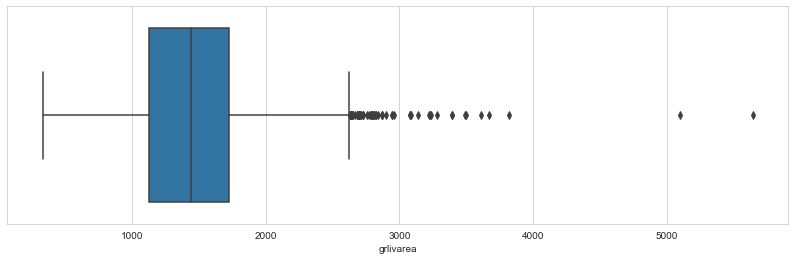

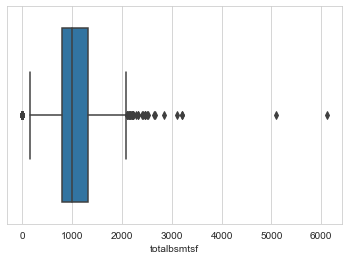

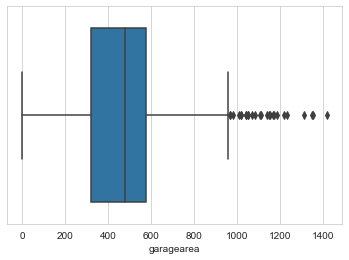

Empty DataFrame
Columns: [id, mssubclass, mszoning, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bedroomabvgr, kitchenabvgr, kitchenqual, functional, fireplaces, fireplacequ, garagetype, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, poolarea, poolqc, fence, miscfeature, miscval, mosold, saletype, saleprice, totalporch, totalbaths, remod, age_blt, age_garage, age_remod]
Index: []

In [53]:
# boxplots to look at potential outliers for continuous variables

# look at features highly correlated w saleprice: grlivarea, totalbsmtsf, garagearea

plt.figure(figsize=(14, 4))

toplot = ["grlivarea", "totalbsmtsf", "garagearea"]
for x in toplot:
    sns.boxplot(train[x])
    plt.show()

# grlivarea seems to have a few outliers above 5000
train[train["grlivarea"] > 5000]
# drop IDs 1499 and 2181 to remove outliers
train = train.drop([908154235, 908154195])
# this also removes the outliers in totalbsmtsf above 5000
train[train["totalbsmtsf"] > 5000]

# removing outliers for garagearea is not as clear cut, and we will leave it for now

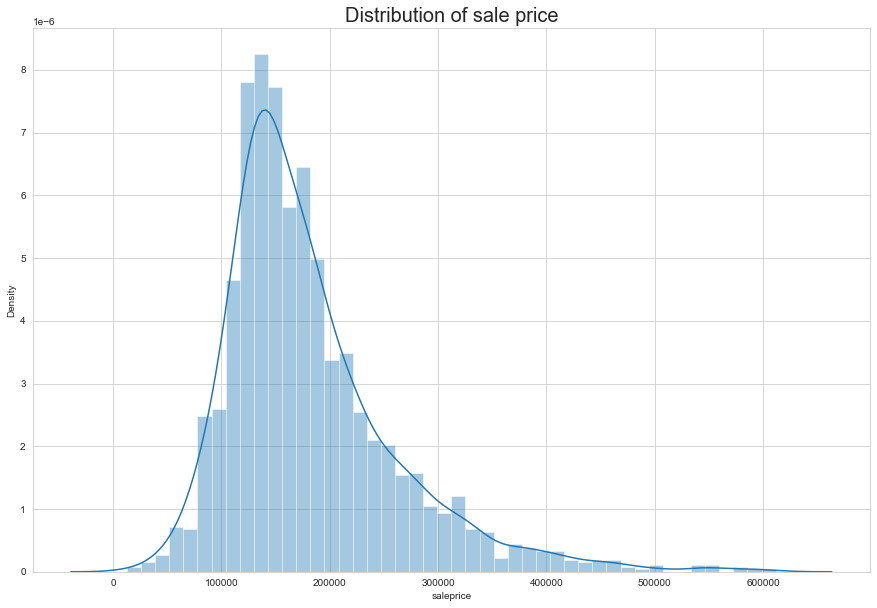

<AxesSubplot:xlabel='saleprice'>

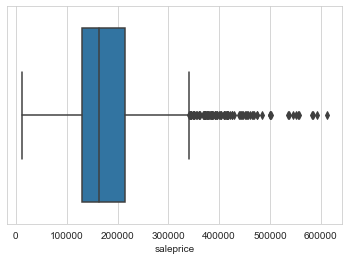

In [54]:
# distribution for sale price -> right skew
plt.figure(figsize=(15, 10))
sns.distplot(train["saleprice"], kde=True)
plt.title('Distribution of sale price', fontsize=20)
plt.show()

sns.boxplot(train["saleprice"])

# difficult to remove outliers for saleprice without looking at pairplot

In [55]:
train[conti].describe()

# there are many features only applicable to a few houses in the data set 
# many features have means above median of 0 (e.g. msvnrarea, poolarea)

lotarea   masvnrarea   bsmtfinsf1   bsmtfinsf2    bsmtunfsf  \
count    2048.000000  2048.000000  2048.000000  2048.000000  2048.000000   
mean    10025.148926    97.784668   437.750977    48.005859   567.373535   
std      6610.091341   171.964817   439.943345   165.074675   445.160156   
min      1300.000000     0.000000     0.000000     0.000000     0.000000   
25%      7500.000000     0.000000     0.000000     0.000000   219.750000   
50%      9417.500000     0.000000   368.000000     0.000000   474.500000   
75%     11503.000000   158.000000   733.000000     0.000000   811.000000   
max    159000.000000  1600.000000  2188.000000  1474.000000  2336.000000   

       totalbsmtsf     1stflrsf     2ndflrsf  lowqualfinsf    grlivarea  \
count  2048.000000  2048.000000  2048.000000   2048.000000  2048.000000   
mean   1053.130371  1160.955078   328.915039      5.520996  1495.391113   
std     426.897109   379.127831   425.521633     51.105842   485.846632   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     793.000000   879.000000     0.000000      0.000000  1128.000000   
50%     994.000000  1092.500000     0.000000      0.000000  1443.000000   
75%    1317.250000  1404.250000   690.250000      0.000000  1728.000000   
max    3206.000000  3820.000000  1862.000000   1064.000000  3820.000000   

        garagearea     poolarea       miscval   totalporch  
count  2048.000000  2048.000000   2048.000000  2048.000000  
mean    472.878418     2.166992     43.349121   182.395020  
std     214.501543    36.305958    434.586400   158.911486  
min       0.000000     0.000000      0.000000     0.000000  
25%     319.000000     0.000000      0.000000    48.750000  
50%     480.000000     0.000000      0.000000   164.000000  
75%     576.000000     0.000000      0.000000   267.000000  
max    1356.000000   800.000000  12500.000000  1424.000000

#### Discrete Variables

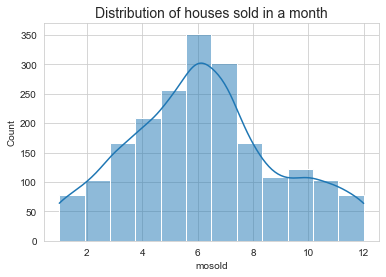

<AxesSubplot:xlabel='mosold'>

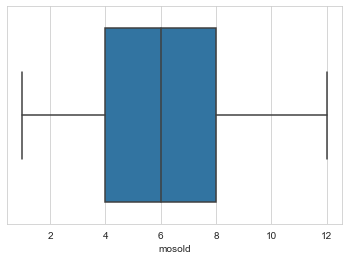

In [56]:
# distribution for month sold
# seems to have the most number of houses sold in June 

sns.histplot(train, x="mosold", bins=12, kde=True)
plt.title('Distribution of houses sold in a month', fontsize=14)
plt.show()

sns.boxplot(train["mosold"])

### Bivariate Analysis
#### First look...

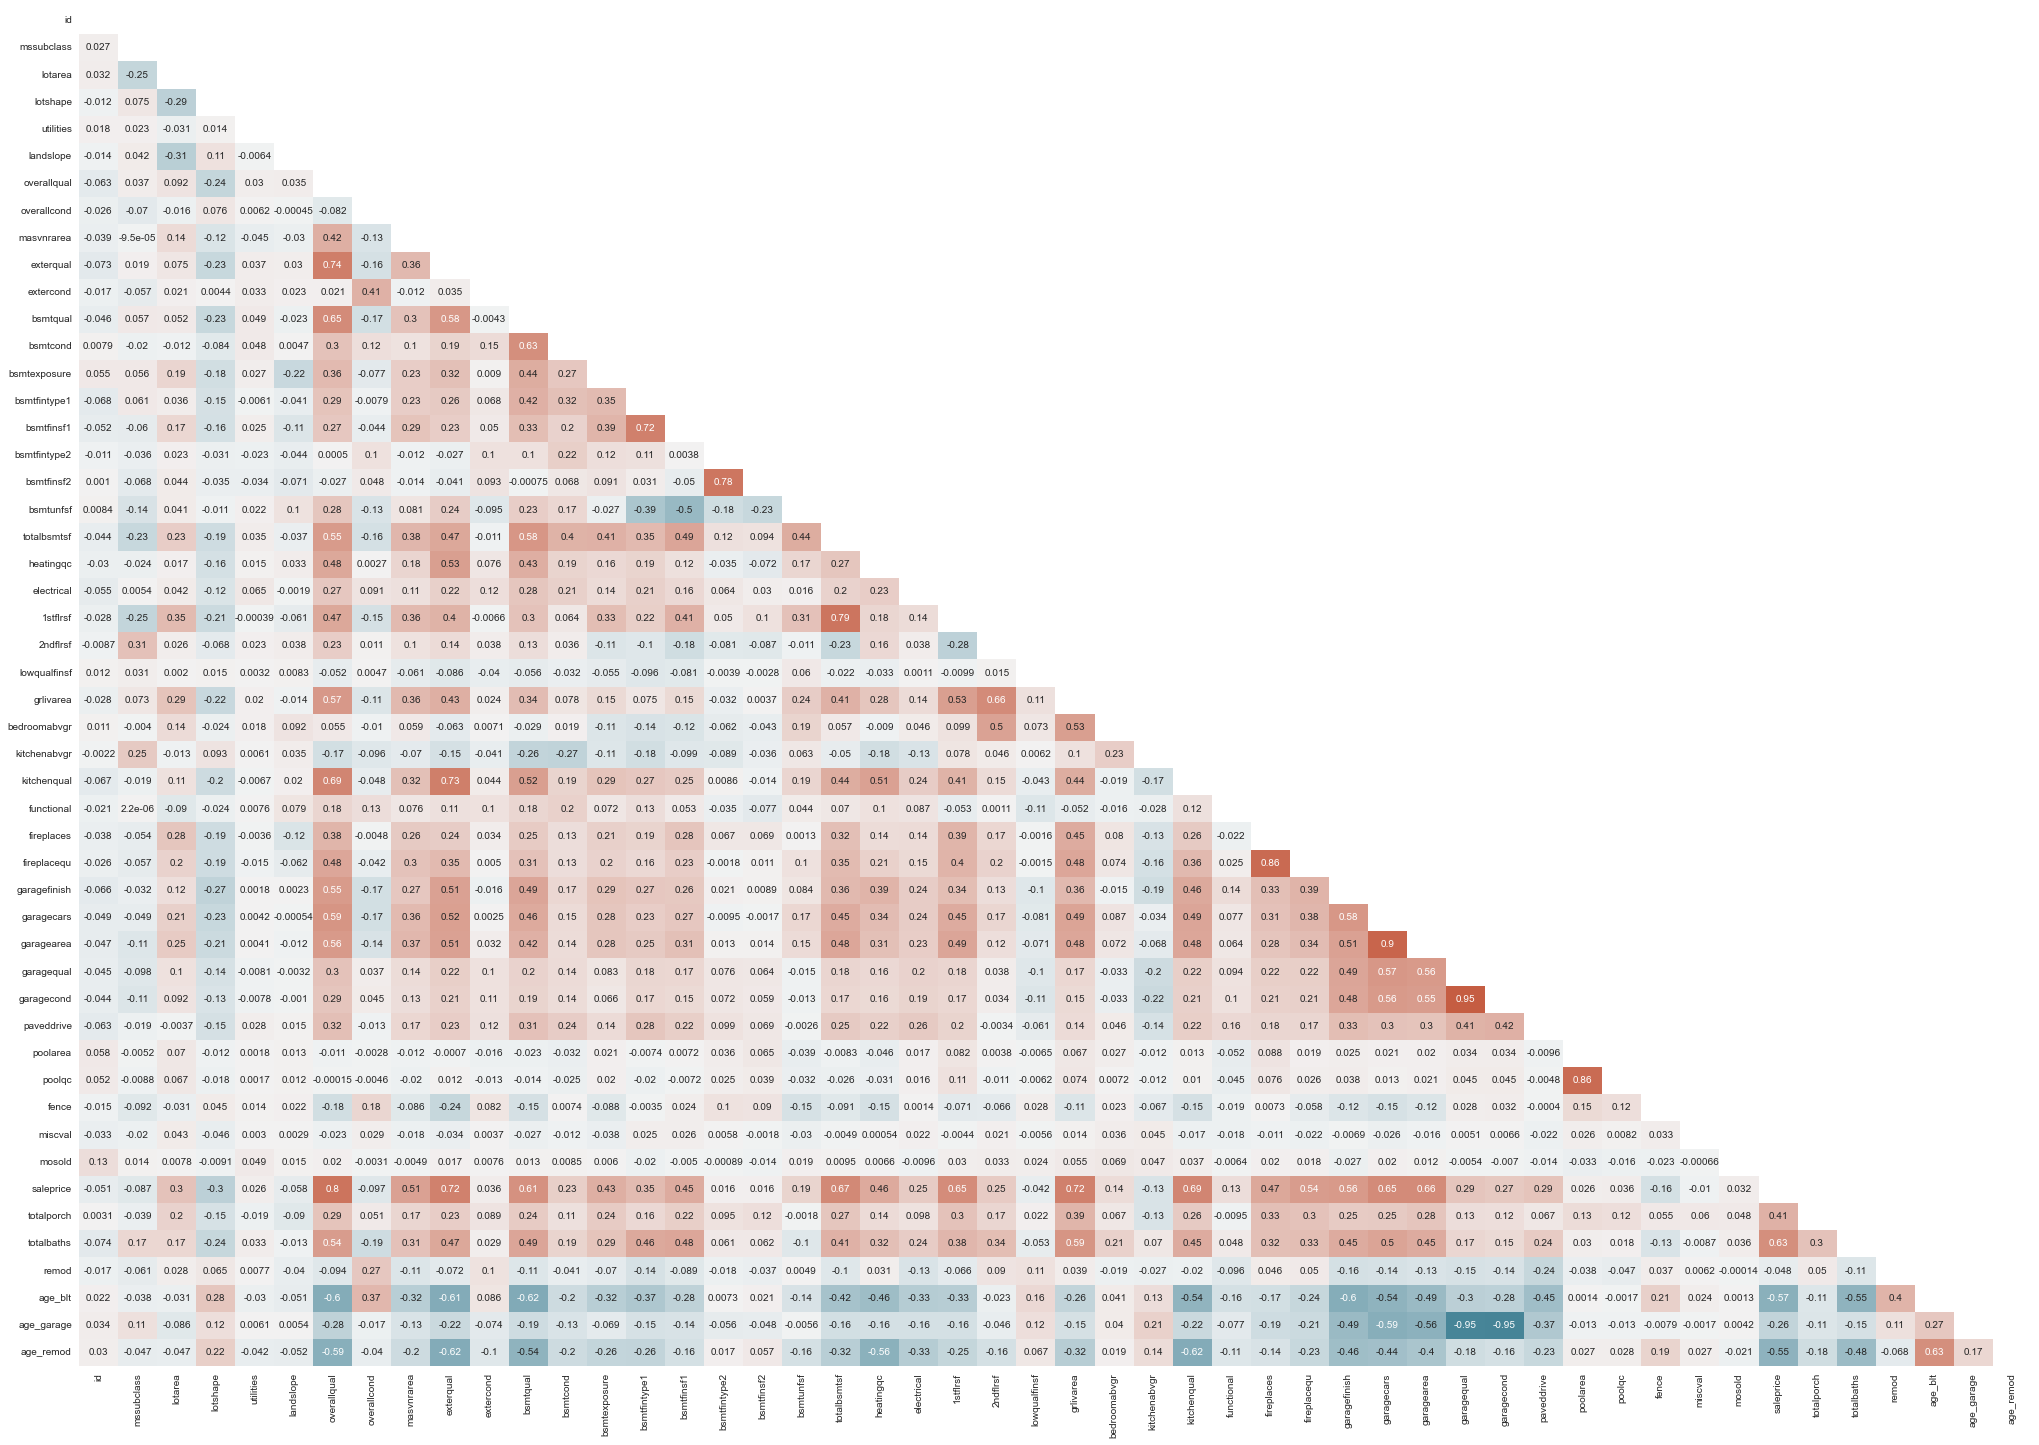

In [57]:
plt.figure(figsize=(35, 25))
corr = train.corr()
matrix = np.triu(corr)
sns.heatmap(
    corr,
    annot=True,
    mask=matrix,
    vmin=-1,
    vmax=1,
    cbar=False,
    cmap=(sns.diverging_palette(220, 20, as_cmap=True)),
)


# find top 20 correlated to sale price (regardless of direction)
abs(train.corr()).nlargest(21, "saleprice")["saleprice"].index
topcorr = ['saleprice', 'overallqual', 'grlivarea', 'exterqual', 'kitchenqual',
       'totalbsmtsf', 'garagearea', 'garagecars', '1stflrsf', 'totalbaths',
       'bsmtqual', 'age_blt', 'garagefinish', 'age_remod', 'fireplacequ',
       'masvnrarea', 'fireplaces', 'heatingqc', 'bsmtfinsf1', 'bsmtexposure',
       'totalporch']

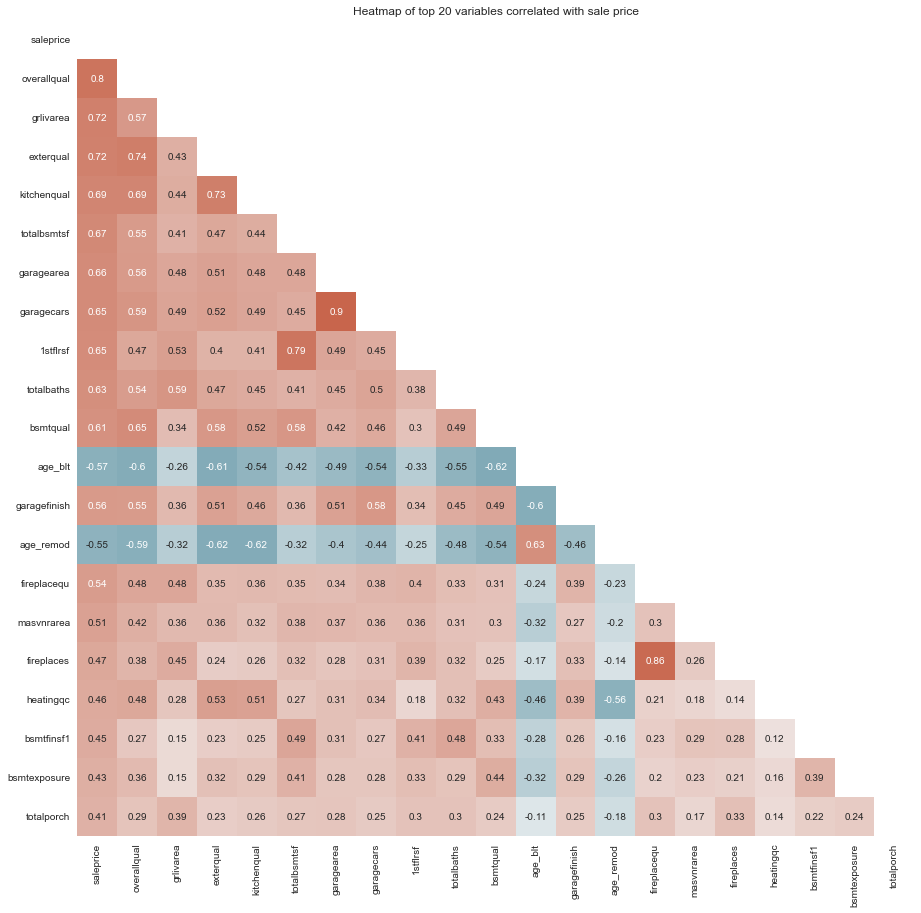

In [58]:
plt.figure(figsize=(15, 15))
corr = train[topcorr].corr()
matrix = np.triu(corr)
sns.heatmap(
    corr,
    annot=True,
    mask=matrix,
    vmin=-1,
    vmax=1,
    cbar=False,
    cmap=(sns.diverging_palette(220, 20, as_cmap=True)),
)
plt.title('Heatmap of top 20 variables correlated with sale price')
plt.show() 

# however this hasn't taken into account nominal variables yet 

Many features exhibit multi-collinearity. Need to choose features carefully before modelling.
- exterqual and kitchenqual is correlated strongly with overallqual (this makes sense)
- garagecars and garagearea are strongly correlated
- grlivarea is strongly correlated with 1stfloorsf and totalbsmtsf 
- fireplaces and fireplacequ highly correlated 

In [59]:
# can further drop some columns due to multi-collinearity 
train.drop('garagecars', axis=1, inplace=True)
discrete.remove('garagecars')
train.drop('fireplaces', axis=1, inplace=True)
discrete.remove('fireplaces')

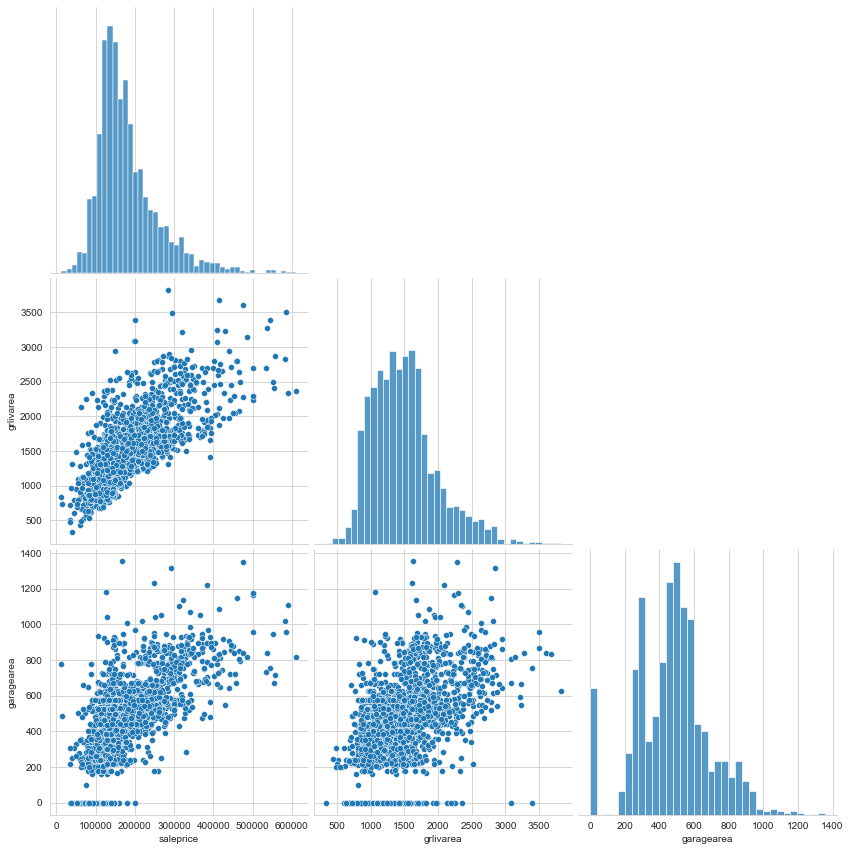

In [60]:
#pairplots for selected features 
sns.pairplot(
    train, vars=["saleprice", "grlivarea", "garagearea"], height=4, corner=True
)
plt.show()

# spread for garagearea vs saleprice is large
# distributions are all right-skewed 

#### Nominal Features

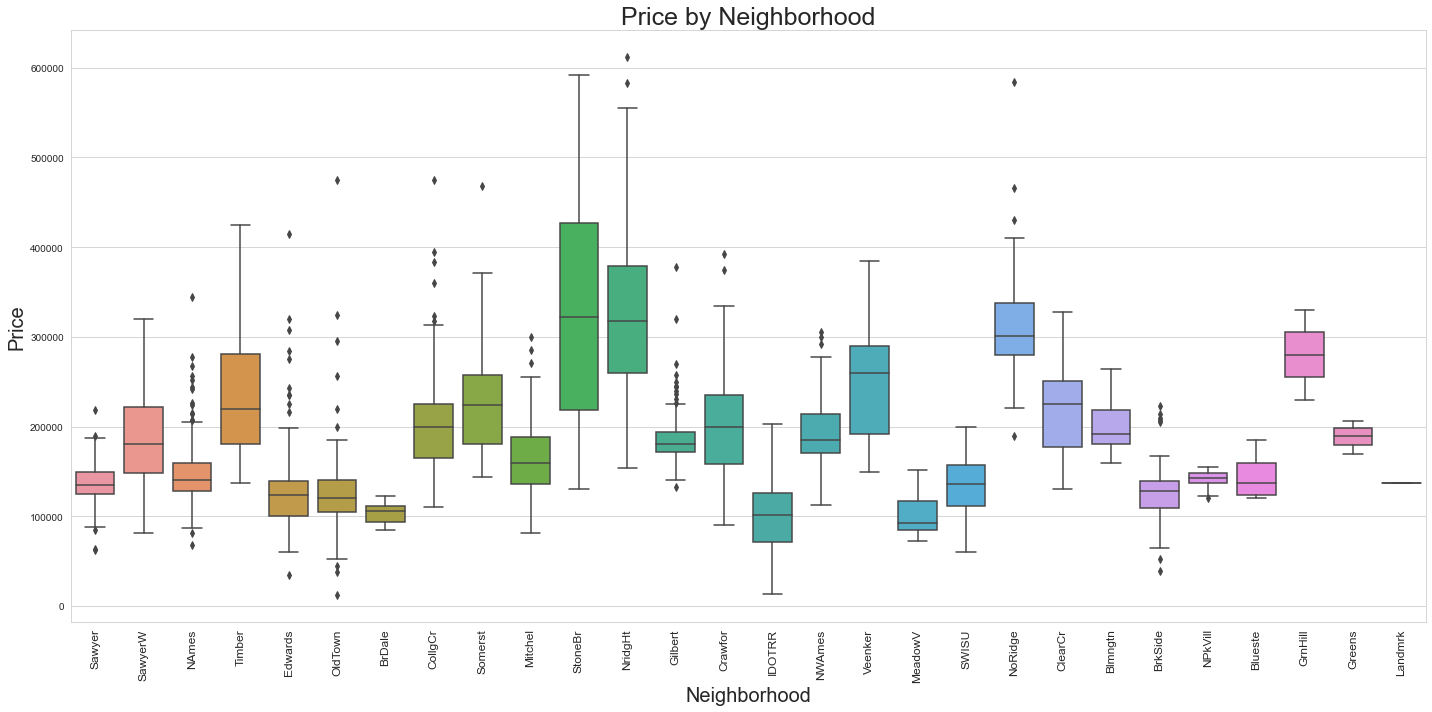

neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127022.697368
ClearCr    217490.074074
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    129905.787234
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     100370.750000
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    167656.707317
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: saleprice, dtype: float64

In [61]:
# by neighborhood - significant differences in prices

plt.figure(figsize=(20, 10))

sns.boxplot(data=train, x="neighborhood", y="saleprice")
plt.xticks(size=12, rotation="vertical")
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title("Price by Neighborhood", fontsize=25)

plt.tight_layout()

plt.show()

mean_nhood = train.groupby(['neighborhood'])['saleprice'].mean()
mean_nhood

In [62]:
# encode neighborhood to be used in model 

train = pd.get_dummies(columns=['neighborhood'], drop_first=False, data=train, prefix='nhood')

In [63]:
train.head()

id  mssubclass mszoning  lotarea street alley  lotshape  \
PID                                                                   
533352170  109          60       RL  13517.0   Pave    NA         3   
531379050  544          60       RL  11492.0   Pave    NA         3   
535304180  153          20       RL   7922.0   Pave    NA         4   
916386060  318          60       RL   9802.0   Pave    NA         4   
906425045  255          50       RL  14235.0   Pave    NA         3   

          landcontour  utilities lotconfig  landslope condition1 condition2  \
PID                                                                           
533352170         Lvl          4   CulDSac          3       RRAe       Norm   
531379050         Lvl          4   CulDSac          3       Norm       Norm   
535304180         Lvl          4    Inside          3       Norm       Norm   
916386060         Lvl          4    Inside          3       Norm       Norm   
906425045         Lvl          4    Inside          3       Norm       Norm   

          bldgtype housestyle  overallqual  overallcond roofstyle roofmatl  \
PID                                                                          
533352170     1Fam     2Story            6            8     Gable  CompShg   
531379050     1Fam     2Story            7            5     Gable  CompShg   
535304180     1Fam     1Story            5            7     Gable  CompShg   
916386060     1Fam     2Story            5            5     Gable  CompShg   
906425045     1Fam     1.5Fin            6            8     Gable  CompShg   

          exterior1st exterior2nd masvnrtype  masvnrarea  exterqual  \
PID                                                                   
533352170     HdBoard     Plywood    BrkFace       289.0          4   
531379050     VinylSd     VinylSd    BrkFace       132.0          4   
535304180     VinylSd     VinylSd       None         0.0          3   
916386060     VinylSd     VinylSd       None         0.0          3   
906425045     Wd Sdng     Plywood       None         0.0          3   

           extercond foundation  bsmtqual  bsmtcond  bsmtexposure  \
PID                                                                 
533352170          3     CBlock         3         3             1   
531379050          3      PConc         4         3             1   
535304180          4     CBlock         3         3             1   
916386060          3      PConc         4         3             1   
906425045          3      PConc         2         4             1   

           bsmtfintype1  bsmtfinsf1  bsmtfintype2  bsmtfinsf2  bsmtunfsf  \
PID                                                                        
533352170             6       533.0             1         0.0      192.0   
531379050             6       637.0             1         0.0      276.0   
535304180             6       731.0             1         0.0      326.0   
916386060             1         0.0             1         0.0      384.0   
906425045             1         0.0             1         0.0      676.0   

           totalbsmtsf heating  heatingqc centralair  electrical  1stflrsf  \
PID                                                                          
533352170        725.0    GasA          5          Y           5     725.0   
531379050        913.0    GasA          5          Y           5     913.0   
535304180       1057.0    GasA          3          Y           5    1057.0   
916386060        384.0    GasA          4          Y           5     744.0   
906425045        676.0    GasA          3          Y           5     831.0   

           2ndflrsf  lowqualfinsf  grlivarea  bedroomabvgr  kitchenabvgr  \
PID                                                                        
533352170     754.0           0.0     1479.0             3             1   
531379050    1209.0           0.0     2122.0             4             1   
535304180       0.0           0.0     1057.0   

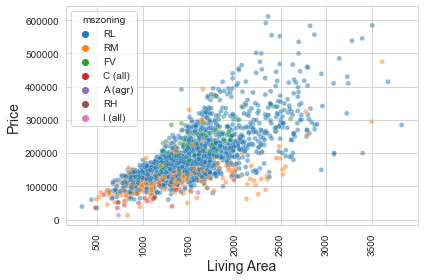

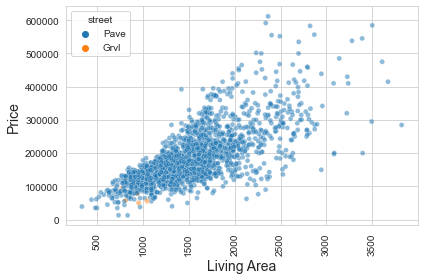

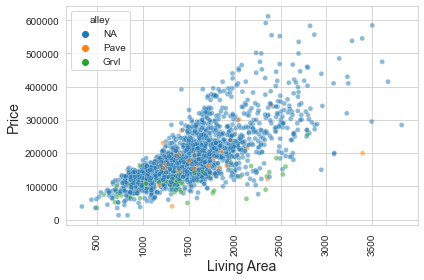

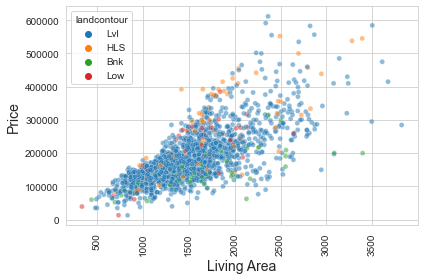

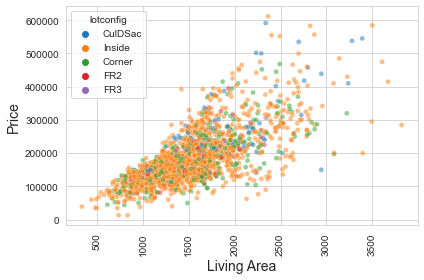

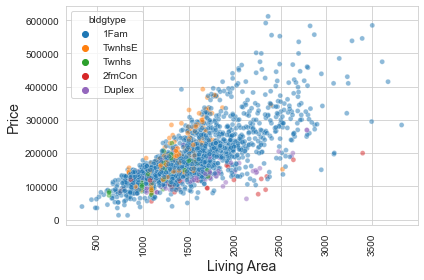

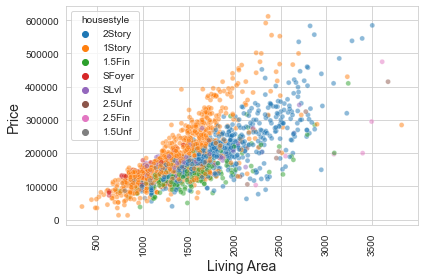

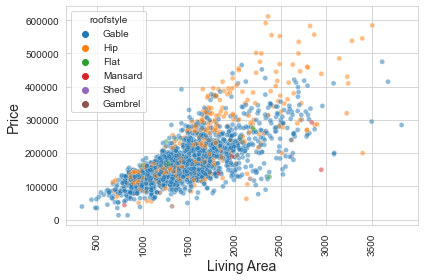

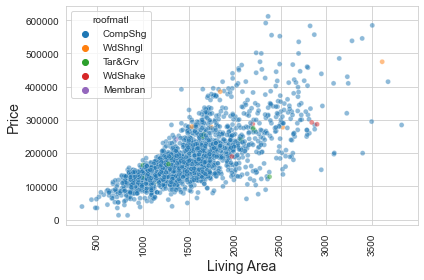

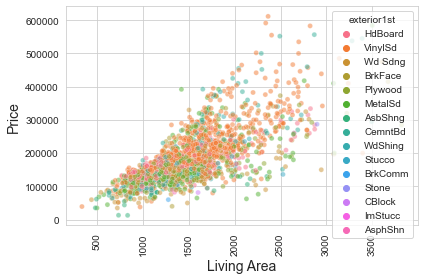

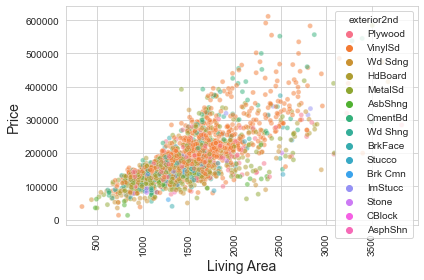

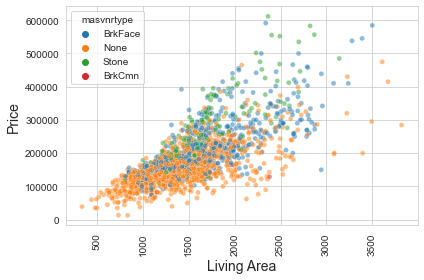

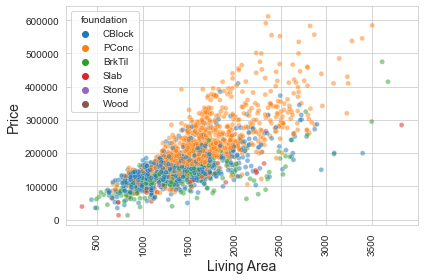

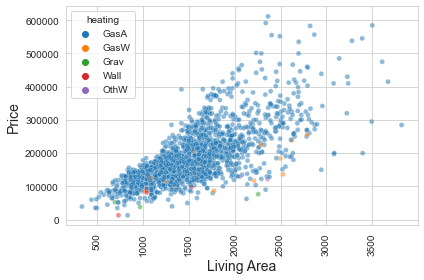

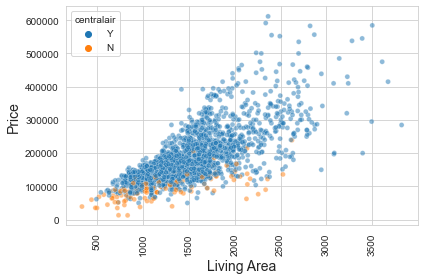

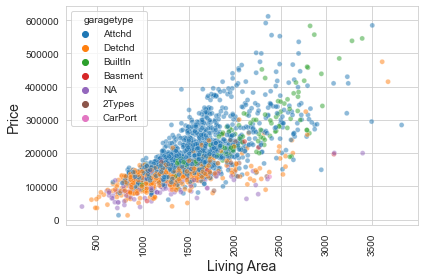

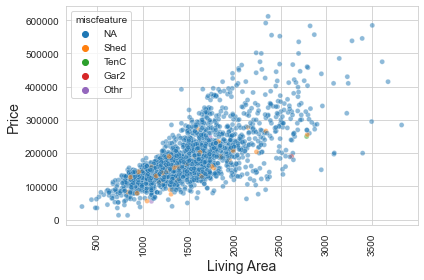

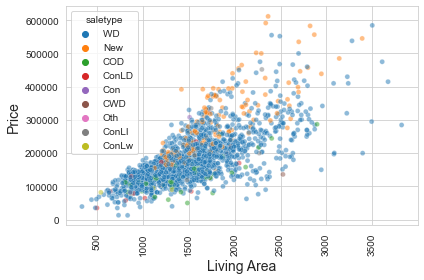

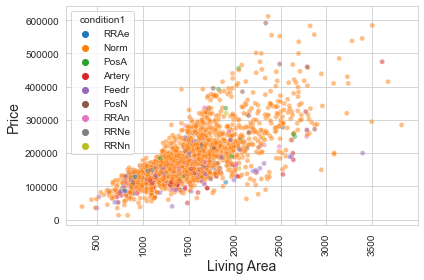

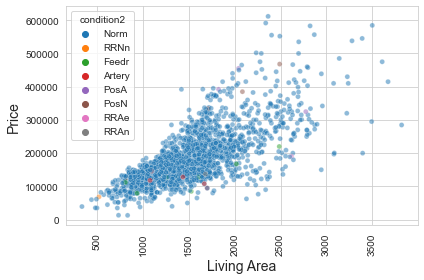

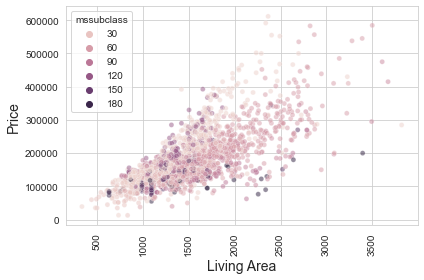

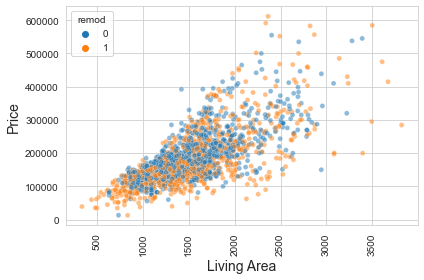

In [64]:
# looking at the remaining nominal features

nominal.remove("neighborhood")

for x in nominal:
    sns.scatterplot(data=train, x="grlivarea", y="saleprice", s=25, hue=x, alpha=0.5)
    plt.xticks(size=10, rotation="vertical")
    plt.xlabel("Living Area", fontsize=14)
    plt.ylabel("Price", fontsize=14)

    plt.tight_layout()

    plt.show()

In [65]:
# features that can be dropped from model

# by street - effects are not significant. most are pavements
train.drop(["street"], axis=1, inplace=True)

# by alley - most houses do not have an alley anyway
train.drop(["alley"], axis=1, inplace=True)

# by roofmatl - most are composite shingle
train.drop(["roofmatl"], axis=1, inplace=True)

# by heating - most are gasA
# also drop associated variables with heating
train.drop(["heating"], axis=1, inplace=True)
train.drop(["heatingqc"], axis=1, inplace=True)

# miscfeature does not show anything interesting, most are NA
train.drop(["miscfeature", "miscval"], axis=1, inplace=True)

# exterior1st and exterior2nd
# there are too many combinations of materials to build a house
# the 2 scatterplots look almost similar
# drop these columns and associated variables
# (ext features also taken into account in overallcond)
train.drop(
    ["exterior1st", "exterior2nd", "exterqual", "extercond"], axis=1, inplace=True
)

# mssubclass has too many types
# in addition some are overlapping with other features (e.g. number of levels)
train.drop(["mssubclass"], axis=1, inplace=True)

count           mean           std      min       25%       50%  \
lotconfig                                                                     
Corner      347.0  180689.043228  74321.888125  44000.0  132000.0  162000.0   
CulDSac     131.0  230744.358779  98419.411679  80000.0  158000.0  215000.0   
FR2          60.0  174703.600000  60125.817532  81000.0  132500.0  162250.0   
FR3           9.0  198600.000000  91734.412845  79000.0  119900.0  207000.0   
Inside     1501.0  177550.548967  77797.974275  12789.0  128000.0  159000.0   

                75%       max  
lotconfig                      
Corner     218418.0  468000.0  
CulDSac    269000.0  591587.0  
FR2        195750.0  394617.0  
FR3        296000.0  315000.0  
Inside     206900.0  611657.0

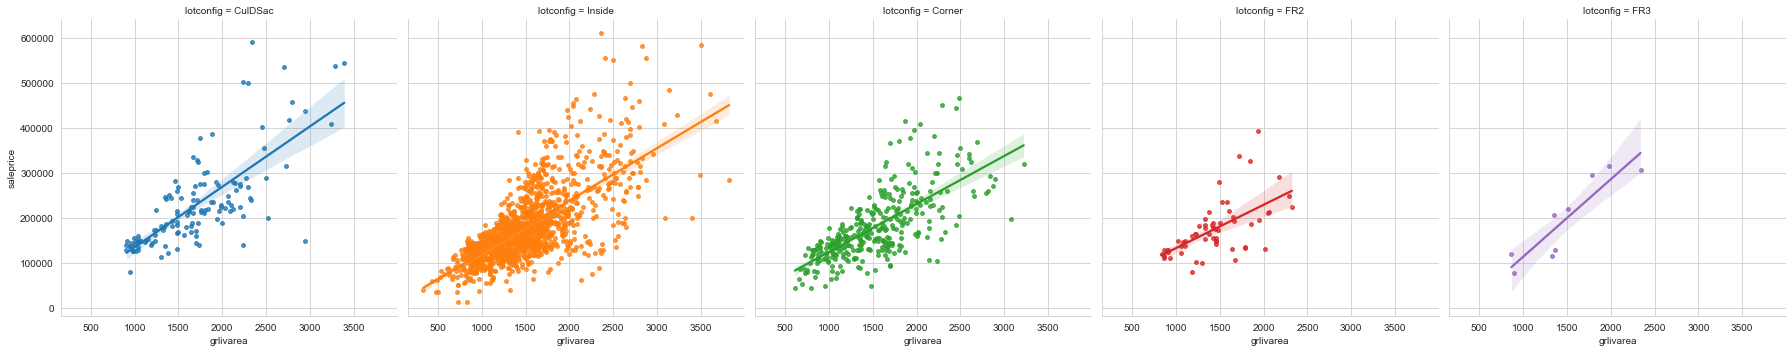

In [66]:
# examining lotconfig - slopes are about the same
# can drop from model

sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="lotconfig",
    hue="lotconfig",
    data=train,
    scatter_kws={"s": 15},
)

display(train.groupby(["lotconfig"])["saleprice"].describe())

train.drop(["lotconfig"], axis=1, inplace=True)

In [67]:
# for aircon, the presence of air con increases price
# we can binarize this column

train["centralair"] = (
    train["centralair"].apply(lambda x: 1 if x == "Y" else 0).astype(int)
)

display(train.groupby(["centralair"])["saleprice"].describe())


count           mean           std      min       25%       50%  \
centralair                                                                     
0            141.0  100575.078014  36971.446560  12789.0   79000.0   98000.0   
1           1907.0  187476.933928  78327.509764  50000.0  135000.0  168000.0   

                 75%       max  
centralair                      
0           125000.0  239000.0  
1           218918.0  611657.0

count           mean            std       min       25%       50%  \
roofstyle                                                                       
Flat         13.0  191613.076923   61659.734752  113500.0  129000.0  167000.0   
Gable      1618.0  171276.833745   64967.015231   12789.0  128000.0  159217.0   
Gambrel      12.0  138208.333333   66068.524459   40000.0   93725.0  125250.0   
Hip         395.0  224632.182278  112372.074507   50138.0  140000.0  180500.0   
Mansard       7.0  152642.857143   80646.716344   44000.0  108500.0  150000.0   
Shed          3.0  208666.666667   63105.731383  157000.0  173500.0  190000.0   

                75%       max  
roofstyle                      
Flat       242000.0  274970.0  
Gable      203000.0  475000.0  
Gambrel    172500.0  259500.0  
Hip        290000.0  611657.0  
Mansard    182500.0  292500.0  
Shed       234500.0  279000.0

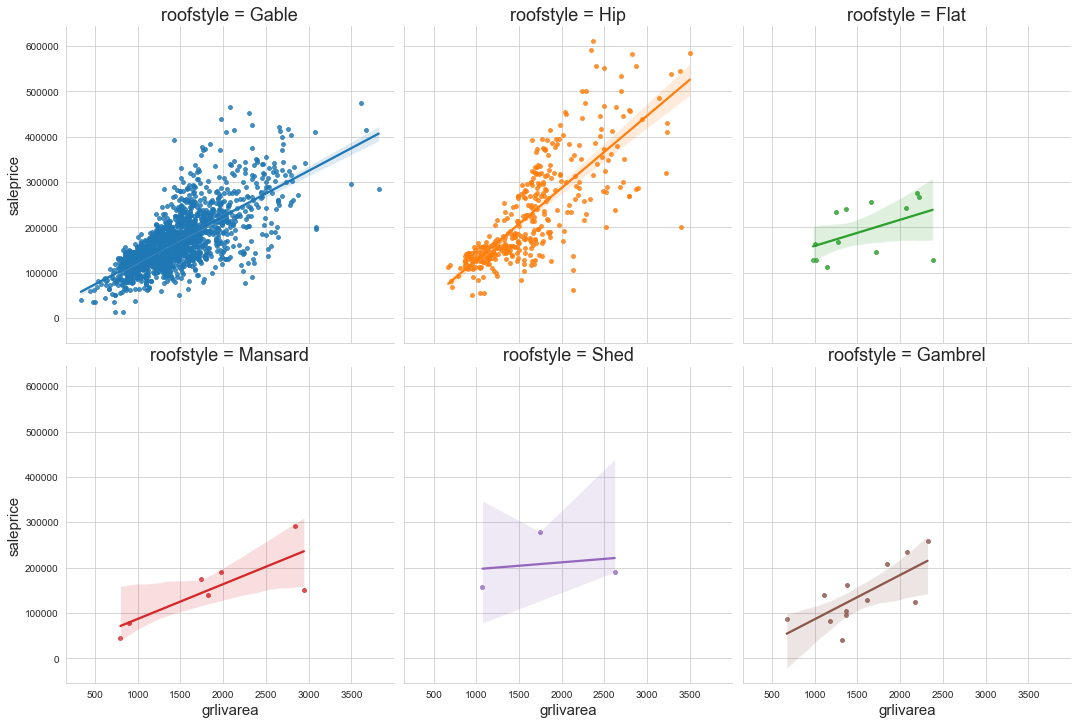

In [68]:
# for roofstyles
# gable and hip are the most common and seem to have a different effect on price

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="roofstyle",
    hue="roofstyle",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)


display(train.groupby(["roofstyle"])["saleprice"].describe())


# get dummies for gable and hip, drop the rest as they are less significant
train = pd.get_dummies(
    columns=["roofstyle"], drop_first=False, data=train, prefix="rstyle"
)
train.drop(
    ["rstyle_Flat", "rstyle_Mansard", "rstyle_Shed", "rstyle_Gambrel"], axis=1, inplace=True
)

count           mean           std       min       25%       50%  \
foundation                                                                     
BrkTil      220.0  128950.831818  52674.722696   12789.0  101750.0  125250.0   
CBlock      863.0  148415.530707  45533.429909   34900.0  122950.0  140750.0   
PConc       924.0  227797.158009  84971.439120   63000.0  173000.0  209100.0   
Slab         34.0  108810.676471  47921.039902   13100.0   88100.0  102350.0   
Stone         5.0  143235.200000  71450.251191   89000.0  102776.0  118000.0   
Wood          2.0  173750.000000  39951.533137  145500.0  159625.0  173750.0   

                 75%       max  
foundation                      
BrkTil      148625.0  475000.0  
CBlock      166500.0  410000.0  
PConc       267937.0  611657.0  
Slab        129500.0  284700.0  
Stone       139900.0  266500.0  
Wood        187875.0  202000.0

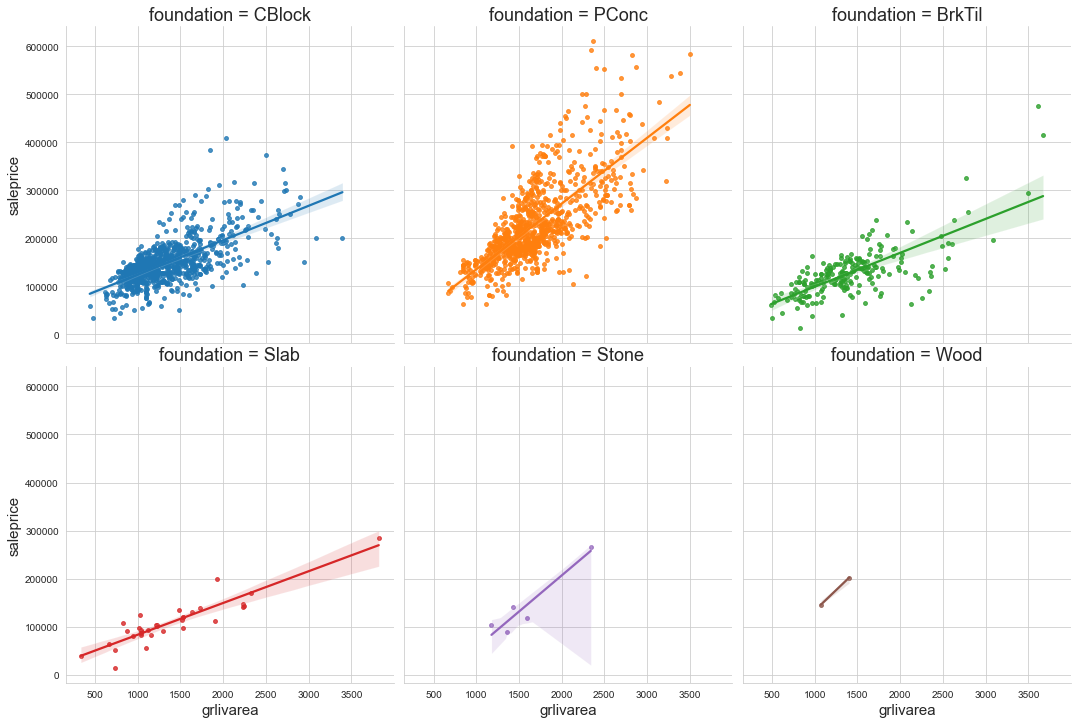

In [69]:
# looking at foundation
# only 3 types are significant and have differing slopes 

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="foundation",
    hue="foundation",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)
    

display(train.groupby(["foundation"])["saleprice"].describe())


# get dummies, drop Slab, Stone and Wood 
train = pd.get_dummies(
    columns=["foundation"], drop_first=False, data=train, prefix="fd"
)
train.drop(
    ["fd_Slab", "fd_Wood", "fd_Stone"], axis=1, inplace=True
)

count           mean           std       min       25%       50%  \
mszoning                                                                      
A (agr)      2.0   47300.000000  48366.103833   13100.0   30200.0   47300.0   
C (all)     19.0   78010.894737  32781.478897   34900.0   50913.5   75000.0   
FV         101.0  218618.316832  53063.423791  144152.0  176500.0  208900.0   
I (all)      1.0   57625.000000           NaN   57625.0   57625.0   57625.0   
RH          14.0  148859.571429  35970.877401   82000.0  128500.0  152217.0   
RL        1596.0  191259.362782  80427.151565   35000.0  137500.0  172500.0   
RM         315.0  129049.968254  50842.786982   12789.0  103200.0  123900.0   

               75%       max  
mszoning                      
A (agr)    64400.0   81500.0  
C (all)   105388.0  140000.0  
FV        254900.0  370878.0  
I (all)    57625.0   57625.0  
RH        180000.0  200000.0  
RL        222500.0  611657.0  
RM        141000.0  475000.0

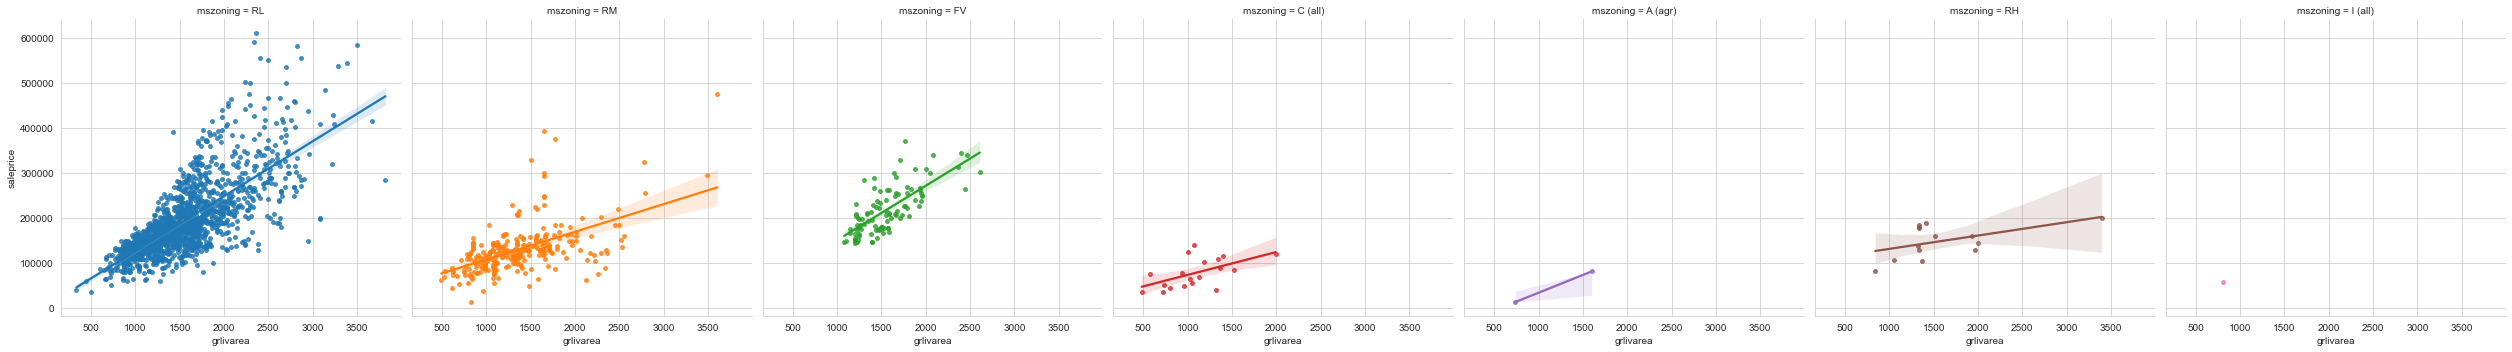

In [70]:
# for mszoning, mostly are in residential zones which will not be useful to model
# drop this column

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="mszoning",
    hue="mszoning",
    data=train,
    scatter_kws={"s": 15},
)


display(train.groupby(["mszoning"])["saleprice"].describe())


train.drop(["mszoning"], axis=1, inplace=True)

count           mean            std      min       25%       50%  \
landslope                                                                      
1            10.0  194598.000000   85068.824659  61000.0  131250.0  200750.0   
2            88.0  204639.465909  102651.673838  13100.0  135125.0  188250.0   
3          1950.0  180382.228718   77952.945973  12789.0  129500.0  161000.0   

                 75%       max  
landslope                       
1          270750.00  302000.0  
2          257682.00  552000.0  
3          212974.25  611657.0

count           mean            std      min       25%  \
landcontour                                                            
Bnk            78.0  142123.743590   49648.704056  52500.0  108875.0   
HLS            85.0  262353.376471  116726.453660  79275.0  173000.0   
Low            43.0  199313.116279   82609.276243  13100.0  143500.0   
Lvl          1842.0  179013.814332   75714.948710  12789.0  129500.0   

                  50%       75%       max  
landcontour                                
Bnk          136500.0  168500.0  315000.0  
HLS          242000.0  355000.0  552000.0  
Low          207000.0  270000.0  385000.0  
Lvl          161000.0  211000.0  611657.0

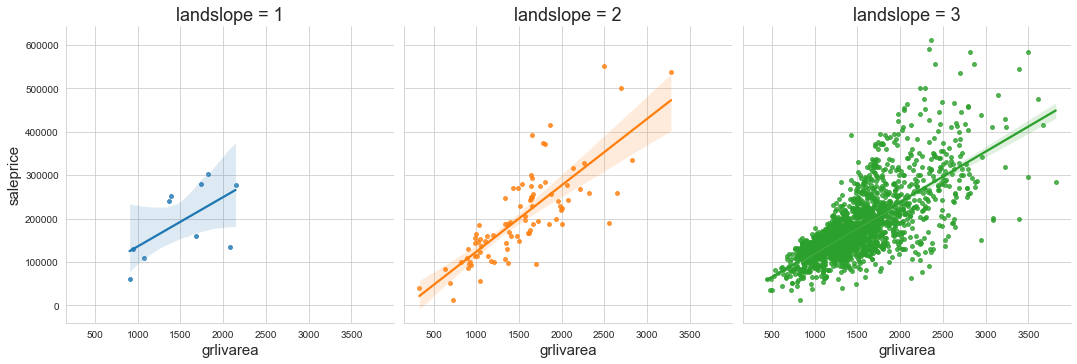

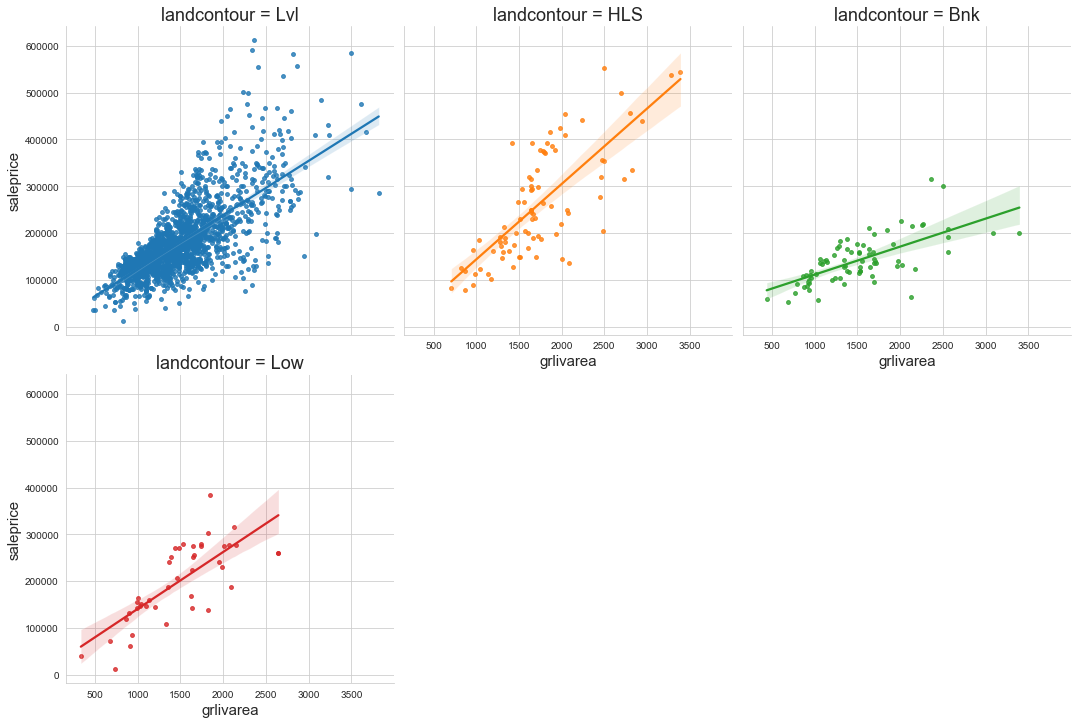

In [71]:
# examining landslope vs landcontour 
# they seem to measuring the same features 
# we can drop landcontour, since landslope is already an ordinal variable 

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="landslope",
    hue="landslope",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)


graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="landcontour",
    hue="landcontour",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)


display(train.groupby(["landslope"])["saleprice"].describe())
display(train.groupby(["landcontour"])["saleprice"].describe())


train.drop(columns=['landcontour'], axis=1, inplace=True)

count           mean            std       min        25%  \
housestyle                                                              
1.5Fin       218.0  136480.091743   44910.975892   37900.0  113250.00   
1.5Unf        12.0  112466.666667   21111.364166   64500.0  107925.00   
1Story      1058.0  179805.375236   81763.702077   12789.0  128000.00   
2.5Fin         6.0  243666.666667  128464.262216  104000.0  192500.00   
2.5Unf        14.0  191785.714286   87041.483100  101000.0  133125.00   
2Story       596.0  206579.951342   82324.947336   40000.0  153306.25   
SFoyer        50.0  149343.920000   31859.449693   73000.0  130475.00   
SLvl          94.0  166248.989362   37262.422556   91000.0  145000.00   

                 50%       75%       max  
housestyle                                
1.5Fin      128700.0  149375.0  410000.0  
1.5Unf      113000.0  122250.0  139400.0  
1Story      156000.0  214000.0  611657.0  
2.5Fin      198500.0  271250.0  475000.0  
2.5Unf      165500.0  212125.0  415000.0  
2Story      189000.0  244100.0  584500.0  
SFoyer      147500.0  169625.0  224500.0  
SLvl        164750.0  177875.0  345000.0

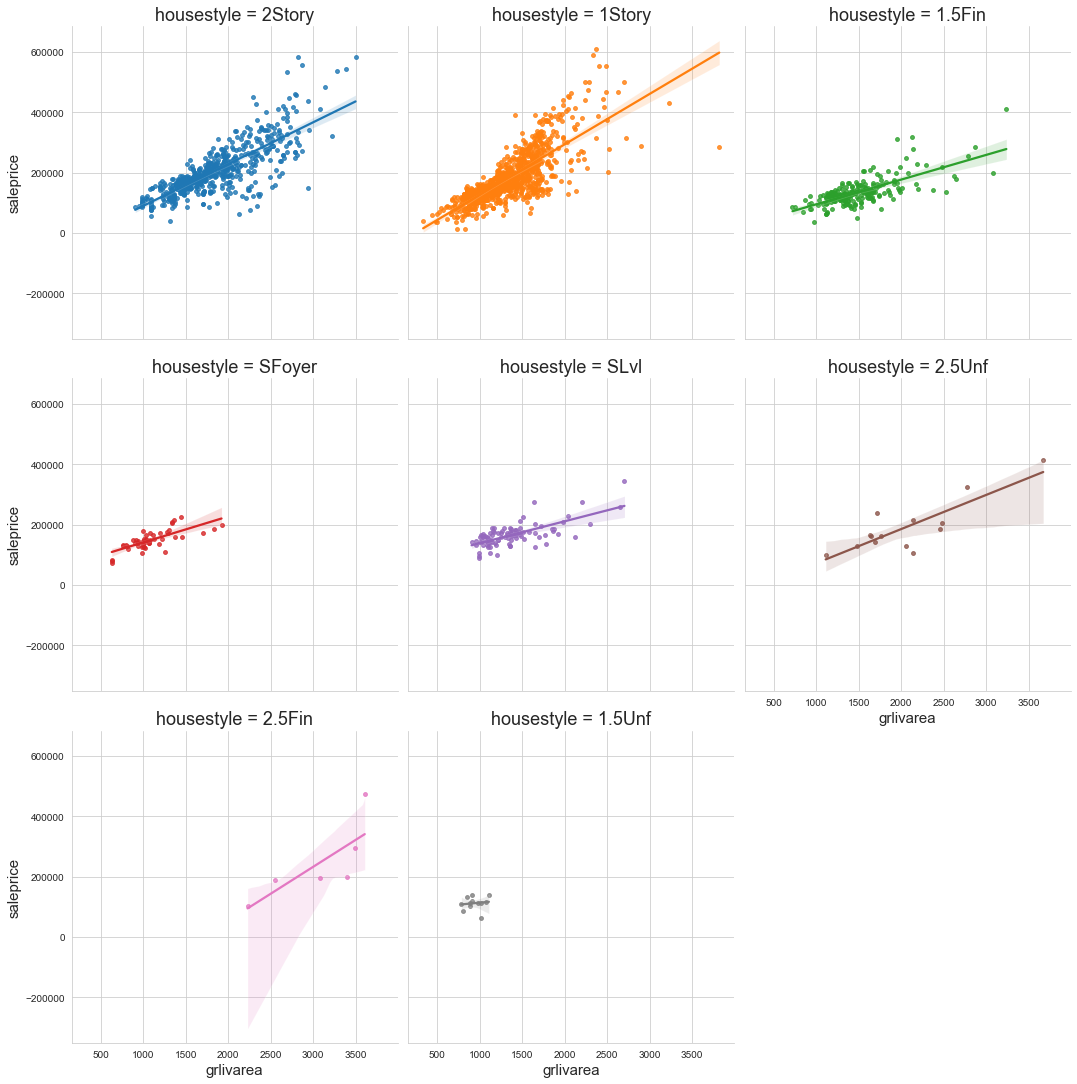

In [72]:
# looking at the house styles

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="housestyle",
    hue="housestyle",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)

display(train.groupby(["housestyle"])["saleprice"].describe())


# unify some of these variables as they essentially mean the same thing
# according to google, a 1.5 level house is a 1 story home with a partial second floor
# and a 2.5 level house is a 2 storey house with an attic
# a split level house is one with 2 levels but staggered (2 storeys)

train["hstyle_2s"] = train["housestyle"].apply(
    lambda x: 1
    if x in ("2Story", "SFoyer", "SLvl", "2.5Unf", "2.5Fin")
    else 0
)


In [73]:
train.drop(columns='housestyle', axis=1, inplace=True)

count           mean           std      min       25%       50%  \
bldgtype                                                                     
1Fam      1697.0  185311.671774  81978.251327  12789.0  130500.0  165250.0   
2Fam       121.0  133169.421488  37866.164907  55000.0  108959.0  129000.0   
twnh       230.0  178748.660870  66002.989549  73000.0  136625.0  170000.0   

               75%       max  
bldgtype                      
1Fam      219500.0  611657.0  
2Fam      146000.0  269500.0  
twnh      209000.0  392500.0

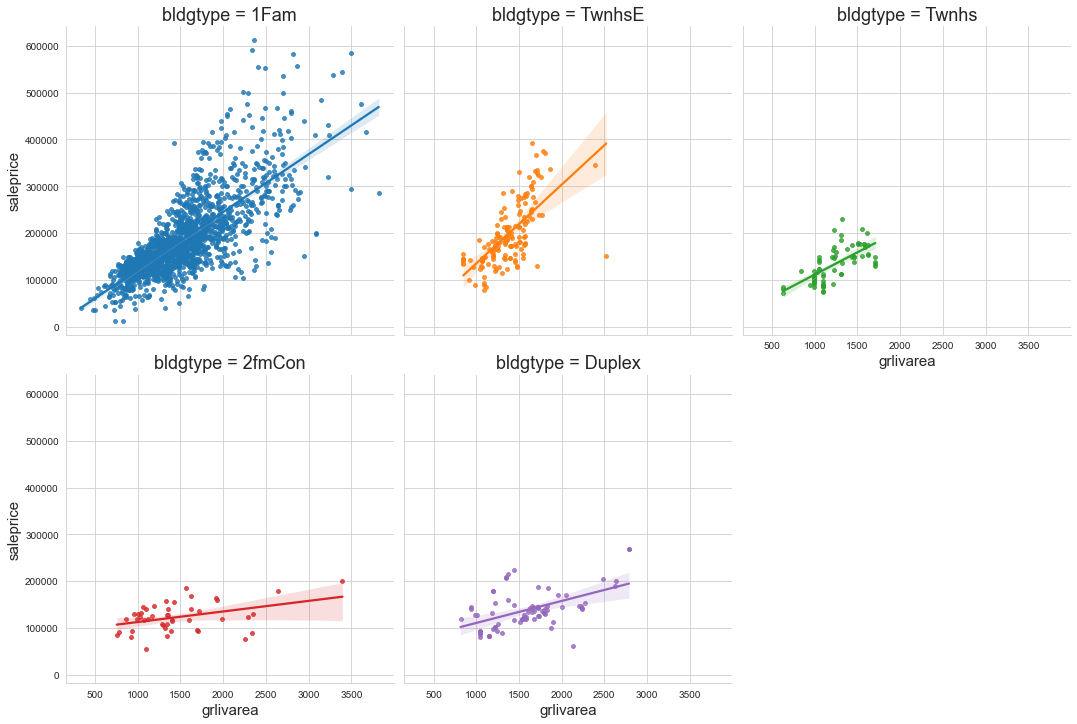

In [74]:
graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="bldgtype",
    hue="bldgtype",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)

# unify the variables again
train["bldgtype"] = train["bldgtype"].apply(
    lambda x: "twnh"
    if x in ("TwnhsE", "Twnhs")
    else "2Fam"
    if x in ("Duplex", "2fmCon")
    else x
)


display(train.groupby(["bldgtype"])["saleprice"].describe())


# get dummies 
train = pd.get_dummies(
    columns=["bldgtype"], drop_first=False, data=train, prefix="btype"
)

count           mean            std      min       25%       50%  \
masvnrtype                                                                      
BrkCmn        13.0  144515.692308   48114.563297  82500.0  118500.0  139000.0   
BrkFace      630.0  212161.436508   82499.362028  75000.0  155000.0  188700.0   
None        1239.0  155124.269572   57119.975803  12789.0  120000.0  143900.0   
Stone        166.0  264820.602410  107423.712599  99000.0  184125.0  248614.0   

                 75%       max  
masvnrtype                      
BrkCmn      163000.0  277000.0  
BrkFace     256000.0  591587.0  
None        183000.0  475000.0  
Stone       321800.0  611657.0

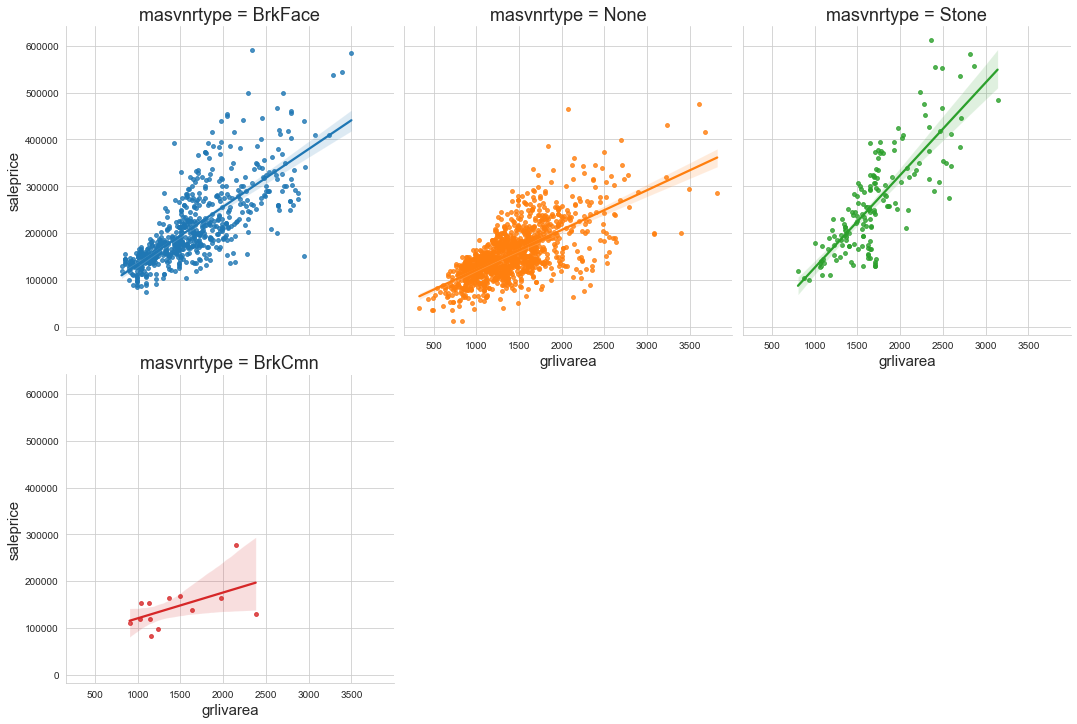

In [75]:
# examining veneer type

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="masvnrtype",
    hue="masvnrtype",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)
    
display(train.groupby(["masvnrtype"])["saleprice"].describe())


#unify BrkFace and BrkCmn
train['masvnrtype'] = train['masvnrtype'].apply(lambda x: "BrkFace" if x in "BrkCmn" else x)


# get dummies, and drop BrkCmn 
train = pd.get_dummies(
    columns=["masvnrtype"], drop_first=False, data=train, prefix="mvtype"
)

count           mean           std      min        25%       50%  \
garagetype                                                                      
2Types        19.0  157184.210526  33828.017040  87000.0  143050.00  150000.0   
Attchd      1211.0  205094.886045  76990.676711  13100.0  150000.00  185900.0   
Basment       27.0  143242.333333  39079.659751  55993.0  122875.00  145000.0   
BuiltIn      132.0  247883.522727  99764.995090  91000.0  176954.25  221900.0   
CarPort       11.0  103823.545455  19675.502999  82000.0   89375.00  101800.0   
Detchd       535.0  132097.852336  40605.378316  12789.0  110000.00  129500.0   
NA           113.0  105669.150442  33704.765812  34900.0   82375.00  104000.0   

                 75%       max  
garagetype                      
2Types      170500.0  235000.0  
Attchd      238750.0  611657.0  
Basment     159000.0  235000.0  
BuiltIn     292809.0  582933.0  
CarPort     108479.5  148000.0  
Detchd      147200.0  475000.0  
NA          128000.0  200500.0

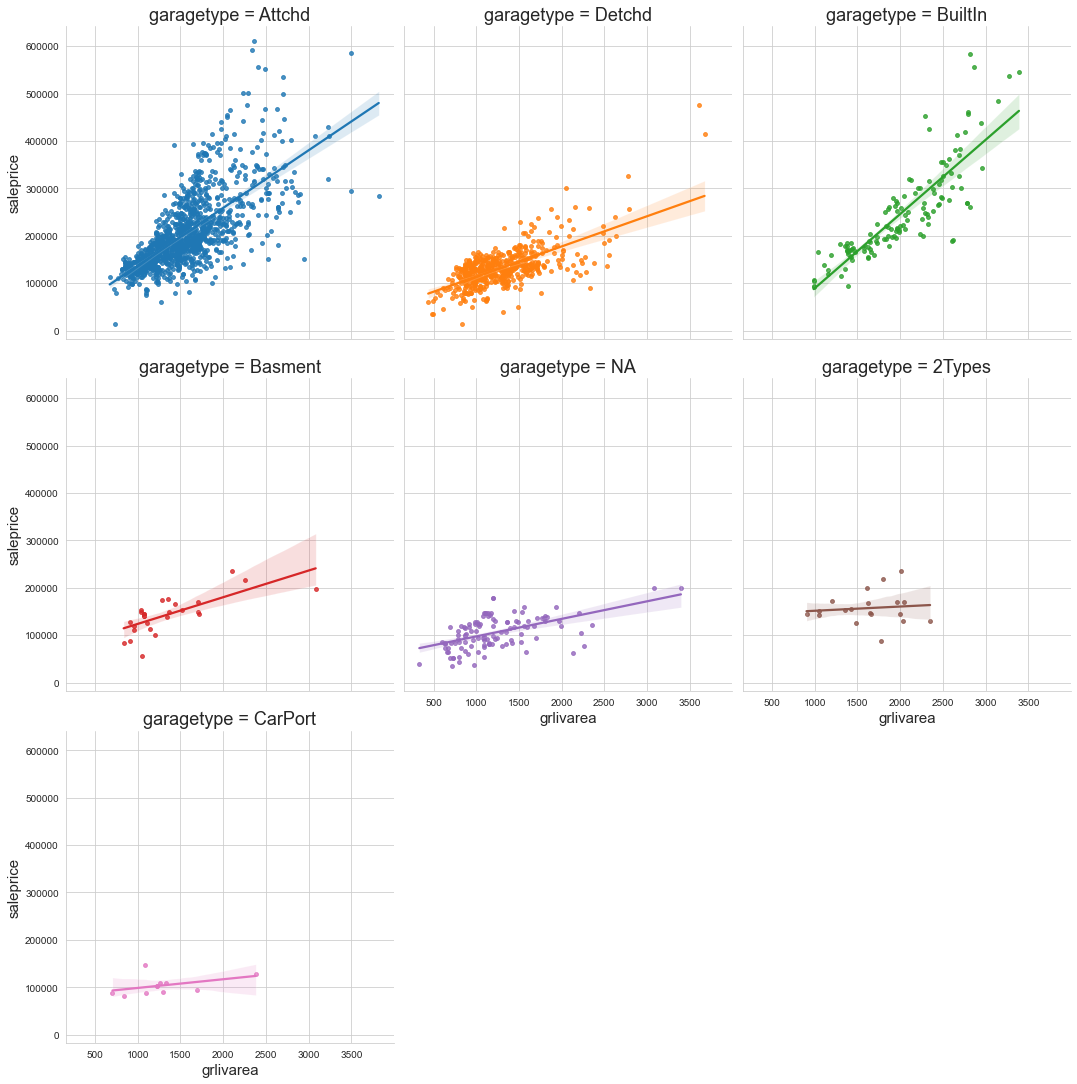

In [76]:
# examining garage type

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="garagetype",
    hue="garagetype",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)
    
display(train.groupby(["garagetype"])["saleprice"].describe())

# get dummies, and drop Basment (this would be represented in basement features), 2Types and carProt 
train = pd.get_dummies(
    columns=["garagetype"], drop_first=False, data=train, prefix="gtype"
)

train.drop(columns=['gtype_2Types', 'gtype_Basment', 'gtype_CarPort'], axis=1, inplace=True)

count           mean            std       min       25%       50%  \
saletype                                                                       
COD         63.0  133574.523810   43931.372458   50000.0  110625.0  127500.0   
CWD         10.0  186635.000000   60724.222011  136000.0  141987.5  160750.0   
Con          4.0  241807.500000   94315.167877  120000.0  191400.0  261615.0   
ConLD       17.0  129091.352941   56798.944278   35000.0   84900.0  130000.0   
ConLI        7.0  207992.857143  134640.015190  110000.0  117000.0  125000.0   
ConLw        5.0  124600.000000   54550.893668   82000.0   90000.0   95000.0   
New        158.0  280376.702532  105289.958932  140000.0  196050.0  260188.5   
Oth          4.0  127497.750000   34545.182302   80000.0  113075.0  137050.0   
WD        1780.0  174925.736517   70810.208259   12789.0  129000.0  158500.0   

                75%       max  
saletype                       
COD       151500.00  287000.0  
CWD       218375.00  328900.0  
Con       312022.50  324000.0  
ConLD     170000.00  235128.0  
ConLI     267500.00  451950.0  
ConLw     144000.00  212000.0  
New       343760.50  611657.0  
Oth       151472.75  155891.0  
WD        206450.00  584500.0

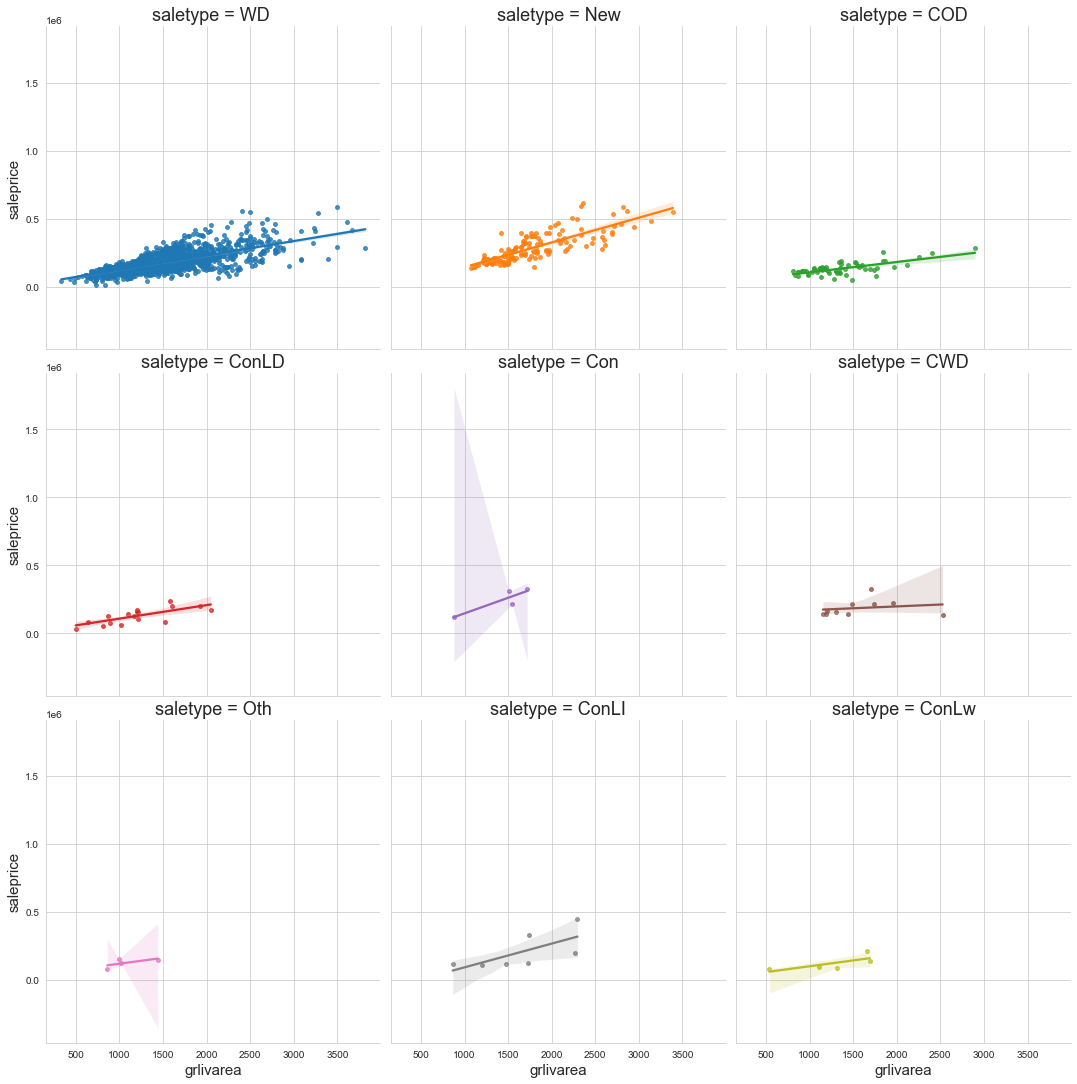

In [77]:
graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="saletype",
    hue="saletype",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)
    
display(train.groupby(["saletype"])["saleprice"].describe())

# new houses seem to fetch a higher sale price 
# create new column for new houses 

train['newhouse'] = train['saletype'].apply(lambda x: 1 if x == 'New' else 0)

#drop saletype
train.drop('saletype', axis=1, inplace=True)

Artery      75.0
Feedr      119.0
Norm      3787.0
PosA        15.0
PosN        30.0
RRAe        22.0
RRAn        37.0
RRNe         NaN
RRNn         8.0
dtype: float64

id  lotarea  lotshape  utilities  landslope condition1  \
PID                                                                   
903452025  1360   6291.0         3          4          3       RRNe   
532479070    90  15410.0         3          4          3       RRNe   
532376080  2491   9308.0         3          4          3       RRNe   

          condition2  overallqual  overallcond  masvnrarea  bsmtqual  \
PID                                                                    
903452025       Norm            6            6         0.0         3   
532479070       Norm            6            6       250.0         3   
532376080       Norm            5            5         0.0         3   

           bsmtcond  bsmtexposure  bsmtfintype1  bsmtfinsf1  bsmtfintype2  \
PID                                                                         
903452025         3             1             1         0.0             1   
532479070         3             4             4       126.0             6   
532376080         3             1             3       554.0             1   

           bsmtfinsf2  bsmtunfsf  totalbsmtsf  centralair  electrical  \
PID                                                                     
903452025         0.0      768.0        768.0           1           5   
532479070       859.0      223.0       1208.0           1           5   
532376080         0.0      430.0        984.0           1           5   

           1stflrsf  2ndflrsf  lowqualfinsf  grlivarea  bedroomabvgr  \
PID                                                                    
903452025     768.0       0.0           0.0      768.0             1   
532479070    1494.0       0.0           0.0     1494.0             3   
532376080     984.0       0.0           0.0      984.0             3   

           kitchenabvgr  kitchenqual  functional  fireplacequ  garagefinish  \
PID                                                                           
903452025             1            3           7            0             1   
532479070             1            3           7            2             3   
532376080             1            3           7            0             1   

           garagearea  garagequal  garagecond  paveddrive  poolarea  poolqc  \
PID                                                                           
903452025       440.0           3           3           1       0.0       0   
532479070       461.0           3           3           3       0.0       0   
532376080       310.0           3           3           3       0.0       0   

           fence  mosold  saleprice  totalporch  totalbaths  remod  age_blt  \
PID                                                                           
903452025      0       7    93850.0        84.0         1.0      1       78   
532479070      4       4   169000.0       482.0         3.0      1       36   
532376080      3       7   126000.0         0.0         1.0      0       41   

           age_garage  age_remod  nhood_Blmngtn  nhood_Blueste  nhood_BrDale  \
PID                                                                            
903452025          78         58              0              0             0   
532479070          36          8              0              0             0   
532376080          41         41              0              0             0   

           nhood_BrkSide  nhood_ClearCr  nhood_CollgCr  nhood_Crawfor  \
PID                                                                     
903452025              0              0              0              0   
532479070              0              0              0              0   
532376080              0              0              0              0   

           nhood_Edwards  nhood_Gilbert  nhood_Greens  nhood_GrnHill  \
PID                                                                    
903452025              0              0             0              0   
532479070   

Empty DataFrame
Columns: [id, lotarea, lotshape, utilities, landslope, condition1, condition2, overallqual, overallcond, masvnrarea, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bedroomabvgr, kitchenabvgr, kitchenqual, functional, fireplacequ, garagefinish, garagearea, garagequal, garagecond, paveddrive, poolarea, poolqc, fence, mosold, saleprice, totalporch, totalbaths, remod, age_blt, age_garage, age_remod, nhood_Blmngtn, nhood_Blueste, nhood_BrDale, nhood_BrkSide, nhood_ClearCr, nhood_CollgCr, nhood_Crawfor, nhood_Edwards, nhood_Gilbert, nhood_Greens, nhood_GrnHill, nhood_IDOTRR, nhood_Landmrk, nhood_MeadowV, nhood_Mitchel, nhood_NAmes, nhood_NPkVill, nhood_NWAmes, nhood_NoRidge, nhood_NridgHt, nhood_OldTown, nhood_SWISU, nhood_Sawyer, nhood_SawyerW, nhood_Somerst, nhood_StoneBr, nhood_Timber, nhood_Veenker, rstyle_Gable, rstyle_Hip, fd_BrkTil, fd_CBlock, fd_PConc, hstyle_2s, btype_1Fam, btype_2Fam, btype_twnh, mvtype_BrkFace, mvtype_None, mvtype_Stone, gtype_Attchd, gtype_BuiltIn, gtype_Detchd, gtype_NA, newhouse]
Index: []

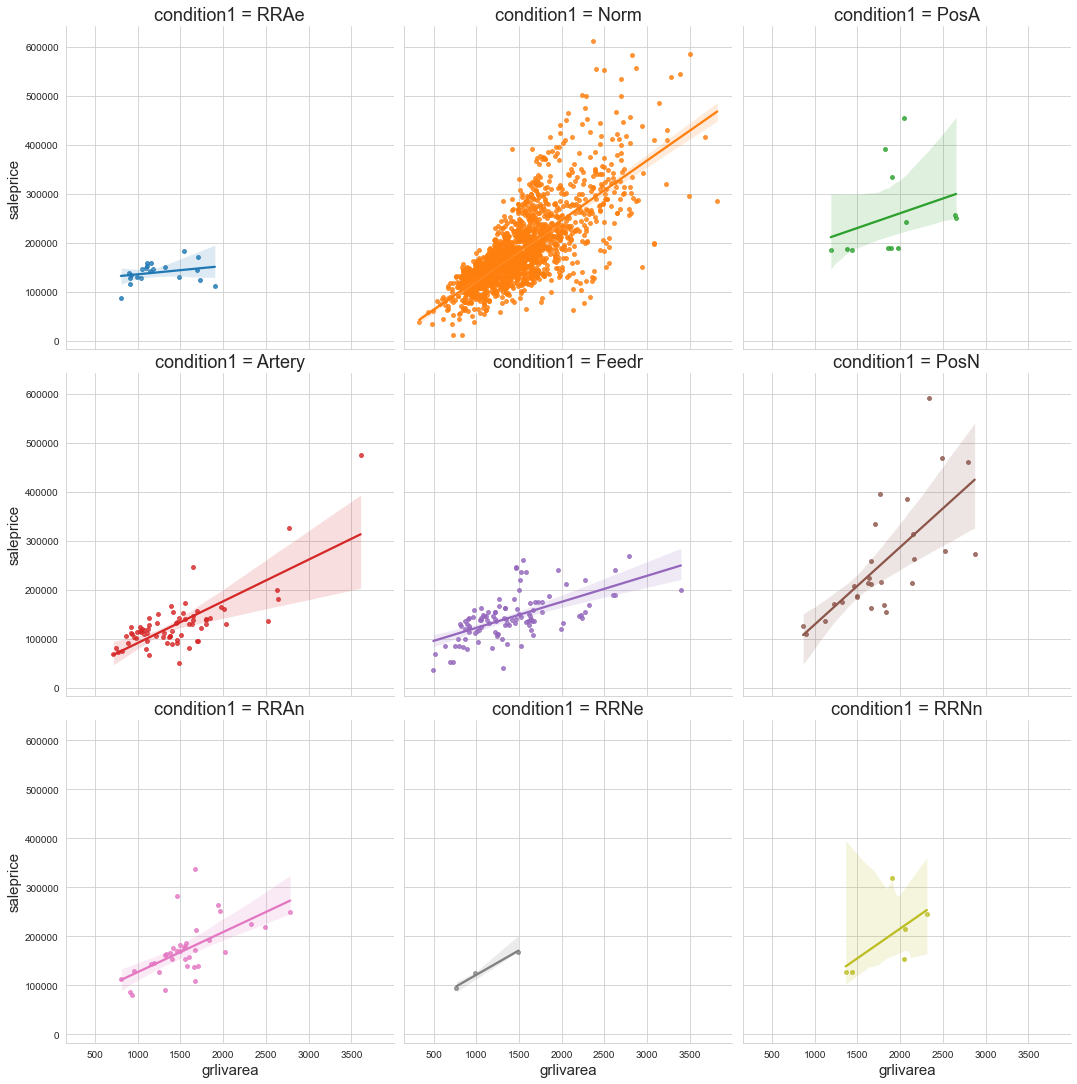

In [78]:
# to examine conditions 1 and 2 together
display(train["condition1"].value_counts() + train["condition2"].value_counts())

display(train[train["condition1"] == "RRNe"])  # 3 RRNe
display(
    train[train["condition2"] == "RRNe"]
)  # causes NaN due to absence of RRNe in cond2

graphs = sns.lmplot(
    x="grlivarea",
    y="saleprice",
    col="condition1",
    hue="condition1",
    data=train,
    scatter_kws={"s": 15},
    col_wrap=3,
)

for i in graphs.axes:
    i.set_xlabel(i.get_xlabel(), fontsize=15)
    i.set_ylabel(i.get_ylabel(), fontsize=15)
    i.set_title(i.get_title(), fontsize=18)

In [79]:
train["condition2"].value_counts()

Norm      2022
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition2, dtype: int64

In [80]:
# norm is the absence of features
# other features can be grouped into broad categories, and combine both conditions 1 and 2 as such

mainrd = ["Artery", "Feedr", "Artery ", "Feedr "]
railway = ["RRNn", "RRAn", "RRNe", "RRAe"]
park = ["PosA", "PosN", "PosA ", "PosN "]

# create binarized columns for the 3 above categories
train["mainrd"] = 0
train.loc[
    train["condition1"].isin(mainrd) | train["condition2"].isin(mainrd), "mainrd"
] = 1
train["mainrd"].value_counts()


train["railway"] = 0
train.loc[
    train["condition1"].isin(railway) | train["condition2"].isin(railway), "railway"
] = 1
train["railway"].value_counts()

train["park"] = 0
train.loc[
    train["condition1"].isin(park) | train["condition2"].isin(park), "park"
] = 1
train["park"].value_counts() 


# drop conditions columns 
train.drop(columns=['condition1', 'condition2'], axis=1, inplace=True)

In [81]:
train.shape

(2048, 92)

In [82]:
# save data set with features binarized
train.to_csv('datasets/train_formodel_v1.csv', index=False)

<a id='link3'></a>

## Data Cleaning - Test set

In [83]:
cleaner(test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 902301120 to 535327160
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             878 non-null    int64  
 1   mssubclass     878 non-null    int64  
 2   mszoning       878 non-null    object 
 3   lotfrontage    718 non-null    float64
 4   lotarea        878 non-null    int64  
 5   street         878 non-null    object 
 6   alley          58 non-null     object 
 7   lotshape       878 non-null    object 
 8   landcontour    878 non-null    object 
 9   utilities      878 non-null    object 
 10  lotconfig      878 non-null    object 
 11  landslope      878 non-null    object 
 12  neighborhood   878 non-null    object 
 13  condition1     878 non-null    object 
 14  condition2     878 non-null    object 
 15  bldgtype       878 non-null    object 
 16  housestyle     878 non-null    object 
 17  overallqual    878 non-null    int64  
 

id  mssubclass  lotfrontage        lotarea  overallqual  \
count   878.000000  878.000000   718.000000     878.000000   878.000000   
mean   1444.749431   58.268793    69.545961   10307.033030     6.050114   
std     850.838263   42.235407    23.533945   10002.674602     1.369065   
min       2.000000   20.000000    21.000000    1477.000000     2.000000   
25%     692.250000   20.000000    59.000000    7297.250000     5.000000   
50%    1433.000000   50.000000    68.000000    9446.000000     6.000000   
75%    2197.500000   70.000000    80.000000   11589.000000     7.000000   
max    2928.000000  190.000000   182.000000  215245.000000    10.000000   

       overallcond    yearbuilt  yearremod/add   masvnrarea   bsmtfinsf1  \
count   878.000000   878.000000     878.000000   877.000000   878.000000   
mean      5.566059  1970.492027    1984.417995   106.236032   441.328018   
std       1.128903    30.395895      20.450725   187.158908   438.457329   
min       1.000000  1880.000000    1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000    1967.000000     0.000000     0.000000   
50%       5.000000  1972.000000    1992.000000     0.000000   373.000000   
75%       6.000000  1999.750000    2003.000000   172.000000   734.750000   
max       9.000000  2010.000000    2010.000000  1378.000000  2288.000000   

        bsmtfinsf2    bsmtunfsf  totalbsmtsf     1stflrsf     2ndflrsf  \
count   878.000000   878.000000   878.000000   878.000000   878.000000   
mean     53.896355   539.133257  1034.357631  1145.787016   348.398633   
std     178.632355   426.172161   413.446291   375.264111   432.985566   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   216.000000   789.000000   864.000000     0.000000   
50%       0.000000   452.000000   975.000000  1063.000000     0.000000   
75%       0.000000   780.000000  1247.000000  1358.000000   720.000000   
max    1526.000000  2046.000000  2630.000000  2674.000000  2065.000000   

       lowqualfinsf    grlivarea  bsmtfullbath  bsmthalfbath    fullbath  \
count    878.000000   878.000000    878.000000    878.000000  878.000000   
mean       2.728929  1496.914579      0.439636      0.055809    1.539863   
std       32.572548   506.468967      0.529948      0.229683    0.559060   
min        0.000000   407.000000      0.000000      0.000000    0.000000   
25%        0.000000  1114.000000      0.000000      0.000000    1.000000   
50%        0.000000  1436.000000      0.000000      0.000000    2.000000   
75%        0.000000  1779.000000      1.000000      0.000000    2.000000   
max      481.000000  4476.000000      2.000000      1.000000    4.000000   

         halfbath  bedroomabvgr  kitchenabvgr  totrmsabvgrd  fireplaces  \
count  878.000000    878.000000    878.000000    878.000000  878.000000   
mean     0.398633      2.879271      1.047836      6.454442    0.618451   
std      0.505927      0.830712      0.223966      1.596632    0.669571   
min      0.000000      0.000000      0.000000      3.000000    0.000000   
25%      0.000000      2.000000      1.000000      5.000000    0.000000   
50%      0.000000      3.000000      1.000000      6.000000    1.000000   
75%      1.000000      3.000000      1.000000      7.000000    1.000000   
max      2.000000      6.000000      3.000000     12.000000    3.000000   

       garageyrblt  garagecars   garagearea  wooddecksf  openporchsf  \
count   833.000000  878.000000   878.000000  878.000000   878.000000   
mean   1976.759904    1.742597   470.362187   93.430524    47.070615   
std      25.689763    0.750391   212.734075  121.181702    68.180939   
min    1900.000000    0.000000     0.000000    0.000000     0.000000   
25%    1960.000000    1.000000   322.500000    0.000000     0.000000   
50%    1978.000000    2.000000   473.000000    0.000000    27.000000   
75%    2001.000000    2.000000   576.000000  170.750000    69.750000   
max    2010.000000    4.000000  1488.000000  690.00


There are 878 rows and 79 columns.


lotfrontage
Null values: 160
Percent null: 7.8%.

alley
Null values: 820
Percent null: 39.98%.

masvnrtype
Null values: 1
Percent null: 0.05%.

masvnrarea
Null values: 1
Percent null: 0.05%.

bsmtqual
Null values: 25
Percent null: 1.22%.

bsmtcond
Null values: 25
Percent null: 1.22%.

bsmtexposure
Null values: 25
Percent null: 1.22%.

bsmtfintype1
Null values: 25
Percent null: 1.22%.

bsmtfintype2
Null values: 25
Percent null: 1.22%.

electrical
Null values: 1
Percent null: 0.05%.

fireplacequ
Null values: 422
Percent null: 20.58%.

garagetype
Null values: 44
Percent null: 2.15%.

garageyrblt
Null values: 45
Percent null: 2.19%.

garagefinish
Null values: 45
Percent null: 2.19%.

garagequal
Null values: 45
Percent null: 2.19%.

garagecond
Null values: 45
Percent null: 2.19%.

poolqc
Null values: 874
Percent null: 42.61%.

fence
Null values: 706
Percent null: 34.42%.

miscfeature
Null values: 837
Percent null: 40.81%.



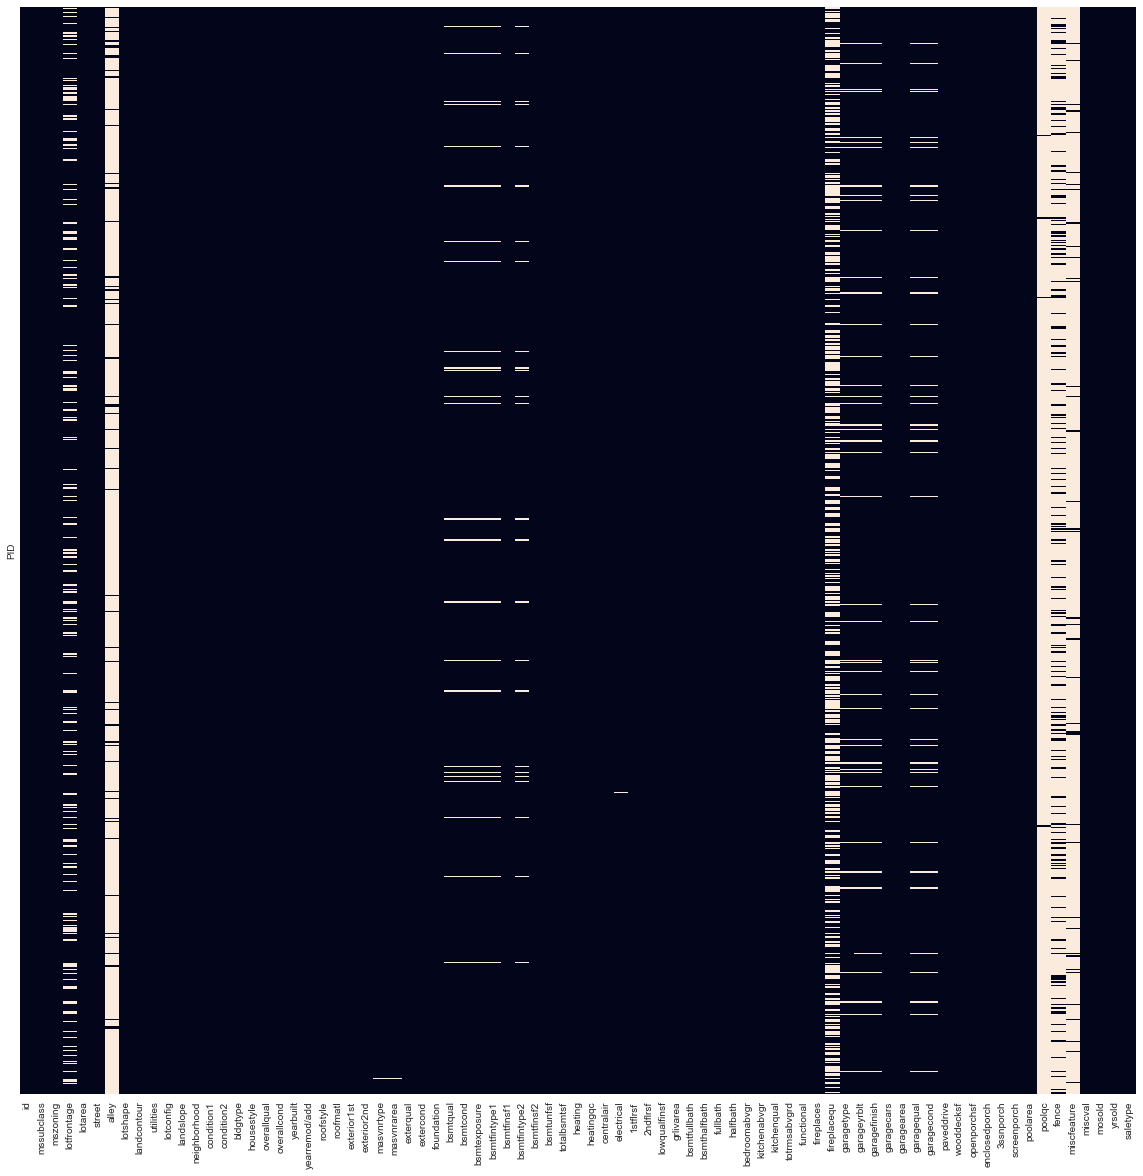

In [84]:
nulldisplay(test)

In [85]:
# Null value cleaning

# Replacing nulls 
test[['alley', 'fence', 'miscfeature', 'poolqc', 'fireplacequ']] = test[['alley', 'fence', 'miscfeature', 'poolqc', 'fireplacequ']].fillna(value="NA")

# Replace garagetype with "NA" for missing values
test[['garagetype']] = test[['garagetype']].fillna(value="NA")

# Replace with "NA" as no garage is present for categorical columns

test[['garagefinish']] = test[['garagefinish']].fillna(value="NA")
test[['garagequal']] = test[['garagequal']].fillna(value="NA")
test[['garagecond']] = test[['garagecond']].fillna(value="NA")

# Replace with 0
test[['garageyrblt']] = test[['garageyrblt']].fillna(value=0)

# veneer nulls
test[['masvnrtype']] = test[['masvnrtype']].fillna(value="None")
test[['masvnrarea']] = test[['masvnrarea']].fillna(value=0.0)

# basement nulls
repl_0 = ['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'bsmtfullbath', 'bsmthalfbath']
repl_na = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2']

test[test['bsmtfintype1'].isnull()].head()
test[test['bsmtfintype1'].isnull()].index
indexes = [905480180, 905228020, 923202060, 534276290, 902427180, 908250040,
            908250030, 535451210, 535451230, 532351150, 535457050, 909177100,
            903232170, 535327230, 908102050, 905475500, 908102130, 903232030,
            909275160, 908204180, 906226070, 531477040, 534451080, 531475220,
            535425050]

test.loc[indexes, repl_0] = test.loc[indexes, repl_0].fillna(0)
test.loc[indexes, repl_na] = test.loc[indexes, repl_na].fillna('NA')

#drop lotfrontage
test.drop('lotfrontage', axis=1, inplace=True)

In [86]:
test['electrical'].value_counts() # to replace null with SBrkr as it is most common

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [87]:
test[test['electrical'].isnull()] #PID 916386080

test.loc[[916386080], 'electrical'] = test.loc[[916386080], 'electrical'].fillna('SBrkr')

In [88]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 902301120 to 535327160
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             878 non-null    int64  
 1   mssubclass     878 non-null    int64  
 2   mszoning       878 non-null    object 
 3   lotarea        878 non-null    int64  
 4   street         878 non-null    object 
 5   alley          878 non-null    object 
 6   lotshape       878 non-null    object 
 7   landcontour    878 non-null    object 
 8   utilities      878 non-null    object 
 9   lotconfig      878 non-null    object 
 10  landslope      878 non-null    object 
 11  neighborhood   878 non-null    object 
 12  condition1     878 non-null    object 
 13  condition2     878 non-null    object 
 14  bldgtype       878 non-null    object 
 15  housestyle     878 non-null    object 
 16  overallqual    878 non-null    int64  
 17  overallcond    878 non-null    int64  
 

In [89]:
# To assign a numerical value to the inputs, where:
# 1 represents the smallest/least favourable
# 0 - NA/absence of feature

# overallqual, overallcond do not need to be replaced
ord_toreplcol = [
    "lotshape",
    "utilities",
    "landslope",
    "exterqual",
    "extercond",
    "bsmtqual",
    "bsmtcond",
    "bsmtexposure",
    "bsmtfintype1",
    "bsmtfintype2",
    "heatingqc",
    "electrical",
    "kitchenqual",
    "functional",
    "fireplacequ",
    "garagefinish",
    "garagequal",
    "garagecond",
    "paveddrive",
    "poolqc",
    "fence"
]

num_ordinalval = [
    {"Reg": 4, "IR1": 3, "IR2": 2, "IR3": 1},
    {"AllPub": 4, "NoSewr": 3, "NoSeWa": 2, "ELO": 1},
    {"Gtl": 3, "Mod": 2, "Sev": 1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    {'Y':3, 'P':2, 'N':1},
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0},
    {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
]

for i in range(len(ord_toreplcol)): 
    test[ord_toreplcol[i]].replace(num_ordinalval[i], inplace=True)

In [90]:
# unification of variables

# total porch area - wooddecksf + openporchsf + enclosedporch + 3ssnporch + screenporch
test["totalporch"] = (
    test["wooddecksf"]
    + test["openporchsf"]
    + test["enclosedporch"]
    + test["3ssnporch"]
    + test["screenporch"]
)



round(100 * (
        test["totrmsabvgrd"]
        == (test["bedroomabvgr"] + test["kitchenabvgr"] + test["fullbath"])
    ).sum()
    / test.shape[0]
)


test.drop(["totrmsabvgrd"], axis=1, inplace=True)

# create a new variable for total bathrooms
test["totalbaths"] = (
    test["bsmtfullbath"]
    + test["bsmthalfbath"]*0.5
    + test["fullbath"]
    + test["halfbath"]*0.5
)


test.drop(
    columns=[
        "bsmtfullbath",
        "bsmthalfbath",
        "fullbath",
        "halfbath",
        "wooddecksf",
        "3ssnporch",
        "openporchsf",
        "screenporch",
        "enclosedporch"
    ],
    axis=1,
    inplace=True,
)

# check if there are input errors first
year_error = test['yearremod/add'] < test['yearbuilt']
year_error.sum()
# set this to yearbuilt instead
test.loc[year_error, 'yearremod/add'] = test.loc[year_error, 'yearbuilt']

noremod = test['yearremod/add'] == test['yearbuilt']
noremod.sum() 

# create new column to indicate if house was remodelled 
test['remod']=1
test.loc[noremod, 'remod']=0
nominal.append('remod')

#create new columns for age
test['age_blt'] = test['yrsold']-test['yearbuilt']
test['age_garage'] = test['yrsold']-test['garageyrblt']
test['age_remod'] = test['yrsold']-test['yearremod/add']

test.drop(columns=['yrsold', 'yearbuilt', 'garageyrblt','yearremod/add'],axis=1, inplace=True)

In [91]:
# OHE and partial feature engineering

test.drop("garagecars", axis=1, inplace=True)
test.drop("fireplaces", axis=1, inplace=True)
test.drop(["street"], axis=1, inplace=True)
test.drop(["alley"], axis=1, inplace=True)
test.drop(["roofmatl"], axis=1, inplace=True)
test.drop(["heating"], axis=1, inplace=True)
test.drop(["heatingqc"], axis=1, inplace=True)
test.drop(["miscfeature", "miscval"], axis=1, inplace=True)
test.drop(
    ["exterior1st", "exterior2nd", "exterqual", "extercond"], axis=1, inplace=True
)
test.drop(["mssubclass"], axis=1, inplace=True)
test.drop(["lotconfig"], axis=1, inplace=True)


test = pd.get_dummies(
    columns=["neighborhood"], drop_first=False, data=test, prefix="nhood"
)
filled=0
test['nhood_Landmrk'] = filled

test = pd.get_dummies(
    columns=["roofstyle"], drop_first=False, data=test, prefix="rstyle"
)

test.drop(
    ["rstyle_Flat", "rstyle_Mansard", "rstyle_Shed", "rstyle_Gambrel"],
    axis=1,
    inplace=True,
)

test = pd.get_dummies(columns=["foundation"], drop_first=False, data=test, prefix="fd")
test.drop(["fd_Slab", "fd_Wood", "fd_Stone"], axis=1, inplace=True)


test["centralair"] = (
    test["centralair"].apply(lambda x: 1 if x == "Y" else 0).astype(int)
)

test.drop(["mszoning"], axis=1, inplace=True)
test.drop(columns=['landcontour'], axis=1, inplace=True)

test["hstyle_2s"] = test["housestyle"].apply(
    lambda x: 1
    if x in ("2Story", "SFoyer", "SLvl", "2.5Unf", "2.5Fin")
    else 0
)
test.drop(columns='housestyle', axis=1, inplace=True)

test["bldgtype"] = test["bldgtype"].apply(
    lambda x: "twnh"
    if x in ("TwnhsE", "Twnhs")
    else "2Fam"
    if x in ("Duplex", "2fmCon")
    else x
)

test = pd.get_dummies(
    columns=["bldgtype"], drop_first=False, data=test, prefix="btype"
)

#unify BrkFace and BrkCmn
test['masvnrtype'] = test['masvnrtype'].apply(lambda x: "BrkFace" if x in "BrkCmn" else x)


# get dummies, and drop BrkCmn 
test = pd.get_dummies(
    columns=["masvnrtype"], drop_first=False, data=test, prefix="mvtype"
)

test = pd.get_dummies(
    columns=["garagetype"], drop_first=False, data=test, prefix="gtype"
)

test.drop(columns=['gtype_2Types', 'gtype_Basment', 'gtype_CarPort'], axis=1, inplace=True)

test['newhouse'] = test['saletype'].apply(lambda x: 1 if x == 'New' else 0)

#drop saletype
test.drop('saletype', axis=1, inplace=True)

# norm is the absence of features
# other features can be grouped into broad categories, and combine both conditions 1 and 2 as such

mainrd = ["Artery", "Feedr", "Artery ", "Feedr "]
railway = ["RRNn", "RRAn", "RRNe", "RRAe"]
park = ["PosA", "PosN", "PosA ", "PosN "]

# create binarized columns for the 3 above categories
test["mainrd"] = 0
test.loc[
    test["condition1"].isin(mainrd) | test["condition2"].isin(mainrd), "mainrd"
] = 1
test["mainrd"].value_counts()


test["railway"] = 0
test.loc[
    test["condition1"].isin(railway) | test["condition2"].isin(railway), "railway"
] = 1
test["railway"].value_counts()

test["park"] = 0
test.loc[
    test["condition1"].isin(park) | test["condition2"].isin(park), "park"
] = 1
test["park"].value_counts() 


# drop conditions columns 
test.drop(columns=['condition1', 'condition2'], axis=1, inplace=True)

In [92]:
test.shape

(878, 91)

In [93]:
# save data set with features binarized
test.to_csv('datasets/test_clean.csv', index=False)